In [492]:
# this will ask you to authenticate with Google
from google.colab import drive
drive.mount('/content/drive')
 
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Uny/DMT')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [493]:
import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [494]:
dataset = pd.read_csv("dataset_mood_smartphone.csv", parse_dates=["time"])
dataset

Unnamed: 0       id                    time        variable   value
0                1  AS14.01 2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01 2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01 2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01 2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01 2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                     ...             ...     ...
376907     2770399  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 5 columns]

In [495]:
# because "Unnamed" seems useless, get rid of it from dataset
dataset = dataset.drop("Unnamed: 0", 1)
dataset

id                    time        variable   value
0       AS14.01 2014-02-26 13:00:00.000            mood   6.000
1       AS14.01 2014-02-26 15:00:00.000            mood   6.000
2       AS14.01 2014-02-26 18:00:00.000            mood   6.000
3       AS14.01 2014-02-26 21:00:00.000            mood   7.000
4       AS14.01 2014-02-27 09:00:00.000            mood   6.000
...         ...                     ...             ...     ...
376907  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032
376908  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008
376909  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026
376910  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033
376911  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 4 columns]

In [496]:
#Obtain all the unique attributes
unique_attributes = dataset.variable.unique()
unique_attributes

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [497]:
#Obtain all the unique ids
unique_ids = dataset.id.unique()
unique_ids

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

Text(0, 0.5, 'Data points')

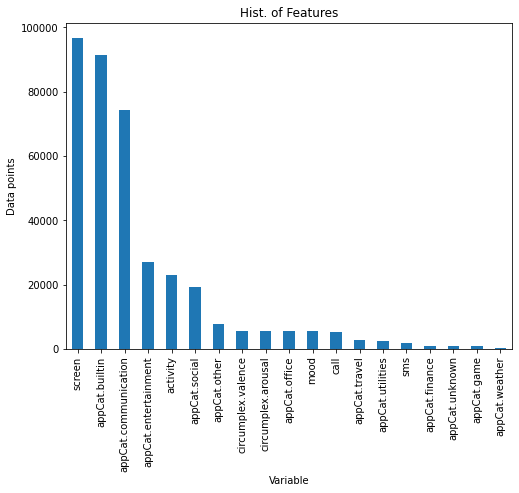

In [498]:
# visualized the dataset by counting variables
hist = pd.DataFrame(dataset.variable.value_counts()).plot(kind='bar', title="Hist. of Features", \
                                                       legend=None, figsize=(8,6))
hist.set_xlabel("Variable")
hist.set_ylabel("Data points")

Text(0, 0.5, 'Data points')

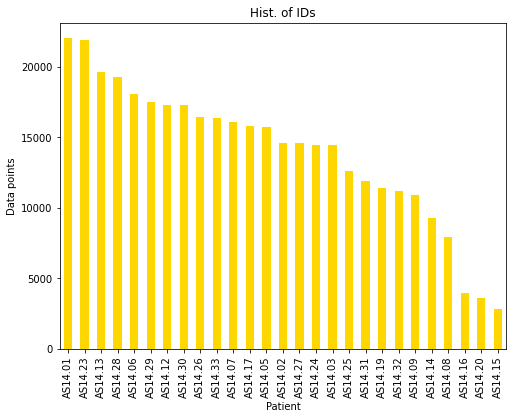

In [499]:
# visualized dataset by counting ids
hist2 = pd.DataFrame(dataset.id.value_counts()).plot(kind="bar", title="Hist. of IDs", \
                                                     legend=None, figsize=(8,6) ,color="gold")
hist2.set_xlabel("Patient")
hist2.set_ylabel("Data points")

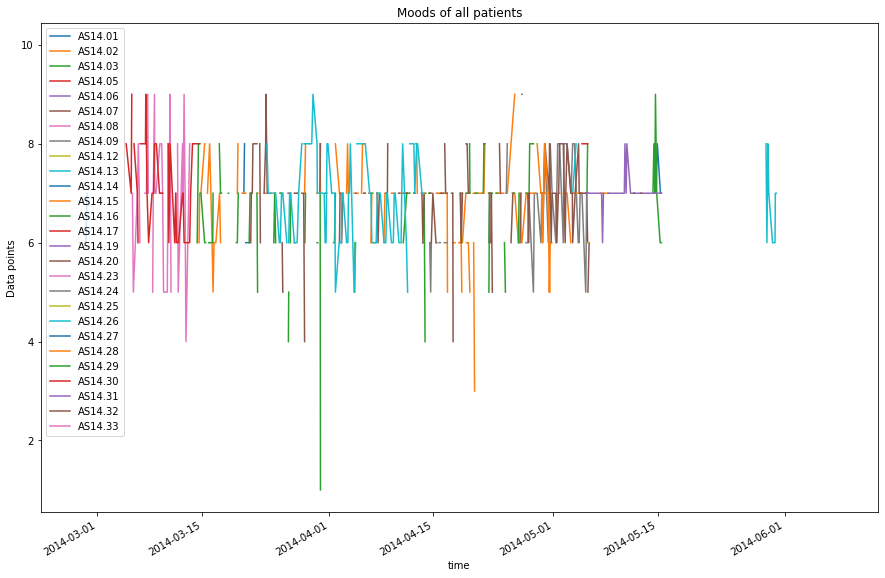

In [500]:
# create an empty dataset which is labeled by ID and time
prodataset = dataset.pivot_table(index=["id","time"], columns="variable",values="value")
# visualized moods of all patients over the time
plt.rcParams["figure.figsize"] = [15,10]
for patient in prodataset.index.levels[0]:
    prodataset.loc[patient]['mood'].plot(label=patient, title="Moods of all patients", ylabel="Data points")
plt.legend();

In [501]:
dataset.set_index("time", inplace=True)

In [502]:
#Created an instance-based database
new_dataset = dataset.pivot_table(index=['id', 'time'], columns=['variable'], values='value')
new_dataset

variable                         activity  appCat.builtin  ...  screen  sms
id      time                                               ...             
AS14.01 2014-02-17 12:04:42.394       NaN             NaN  ...     NaN  NaN
        2014-02-17 18:28:25.520       NaN             NaN  ...     NaN  NaN
        2014-02-18 09:29:51.257       NaN             NaN  ...     NaN  NaN
        2014-02-19 14:43:30.575       NaN             NaN  ...     NaN  NaN
        2014-02-19 17:29:10.378       NaN             NaN  ...     NaN  NaN
...                                   ...             ...  ...     ...  ...
AS14.33 2014-05-30 22:32:05.016       NaN             NaN  ...     NaN  NaN
        2014-05-30 22:32:11.049       NaN           3.122  ...     NaN  NaN
        2014-05-30 22:32:14.240       NaN           1.003  ...     NaN  NaN
        2014-05-30 22:32:15.246       NaN           4.134  ...     NaN  NaN
        2014-05-31 12:00:00.000       NaN             NaN  ...     NaN  NaN

[358926 rows x 19 columns]

In [503]:
#Transform the first index(each patient) into a column "id"
new_dataset.reset_index(level=0, inplace=True)
new_dataset

variable                      id  activity  appCat.builtin  ...  mood  screen  sms
time                                                        ...                   
2014-02-17 12:04:42.394  AS14.01       NaN             NaN  ...   NaN     NaN  NaN
2014-02-17 18:28:25.520  AS14.01       NaN             NaN  ...   NaN     NaN  NaN
2014-02-18 09:29:51.257  AS14.01       NaN             NaN  ...   NaN     NaN  NaN
2014-02-19 14:43:30.575  AS14.01       NaN             NaN  ...   NaN     NaN  NaN
2014-02-19 17:29:10.378  AS14.01       NaN             NaN  ...   NaN     NaN  NaN
...                          ...       ...             ...  ...   ...     ...  ...
2014-05-30 22:32:05.016  AS14.33       NaN             NaN  ...   NaN     NaN  NaN
2014-05-30 22:32:11.049  AS14.33       NaN           3.122  ...   NaN     NaN  NaN
2014-05-30 22:32:14.240  AS14.33       NaN           1.003  ...   NaN     NaN  NaN
2014-05-30 22:32:15.246  AS14.33       NaN           4.134  ...   NaN     NaN  NaN
2014-05-31 12:00:00.000  AS14.33       NaN             NaN  ...   7.0     NaN  NaN

[358926 rows x 20 columns]

In [504]:
new_dataset.describe() 

variable      activity  appCat.builtin  ...        screen     sms
count     22965.000000    91288.000000  ...  96578.000000  1798.0
mean          0.115958       18.538262  ...     75.335206     1.0
std           0.186946      415.989243  ...    253.822497     0.0
min           0.000000   -82798.871000  ...      0.035000     1.0
25%           0.000000        2.020000  ...      5.322250     1.0
50%           0.021739        4.038000  ...     20.044500     1.0
75%           0.158333        9.922000  ...     62.540250     1.0
max           1.000000    33960.246000  ...   9867.007000     1.0

[8 rows x 19 columns]

In [505]:
#Group each datased by theier respective ids
group_dataset = new_dataset.groupby(["id"])
group_dataset.get_group("AS14.30")

variable                      id  activity  appCat.builtin  ...  mood  screen  sms
time                                                        ...                   
2014-02-17 20:38:00.928  AS14.30       NaN             NaN  ...   NaN     NaN  NaN
2014-02-18 12:07:07.164  AS14.30       NaN             NaN  ...   NaN     NaN  NaN
2014-02-18 18:20:52.088  AS14.30       NaN             NaN  ...   NaN     NaN  NaN
2014-02-20 15:26:16.441  AS14.30       NaN             NaN  ...   NaN     NaN  NaN
2014-02-21 16:11:08.698  AS14.30       NaN             NaN  ...   NaN     NaN  NaN
...                          ...       ...             ...  ...   ...     ...  ...
2014-05-04 19:57:46.467  AS14.30       NaN             NaN  ...   NaN     NaN  NaN
2014-05-04 21:00:00.000  AS14.30       NaN             NaN  ...   8.0     NaN  NaN
2014-05-05 09:00:00.000  AS14.30       NaN             NaN  ...   8.0     NaN  NaN
2014-05-05 13:00:00.000  AS14.30       NaN             NaN  ...   8.0     NaN  NaN
2014-05-05 15:00:00.000  AS14.30       NaN             NaN  ...   8.0     NaN  NaN

[16434 rows x 20 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f450c2ad190>,
      dtype=object)

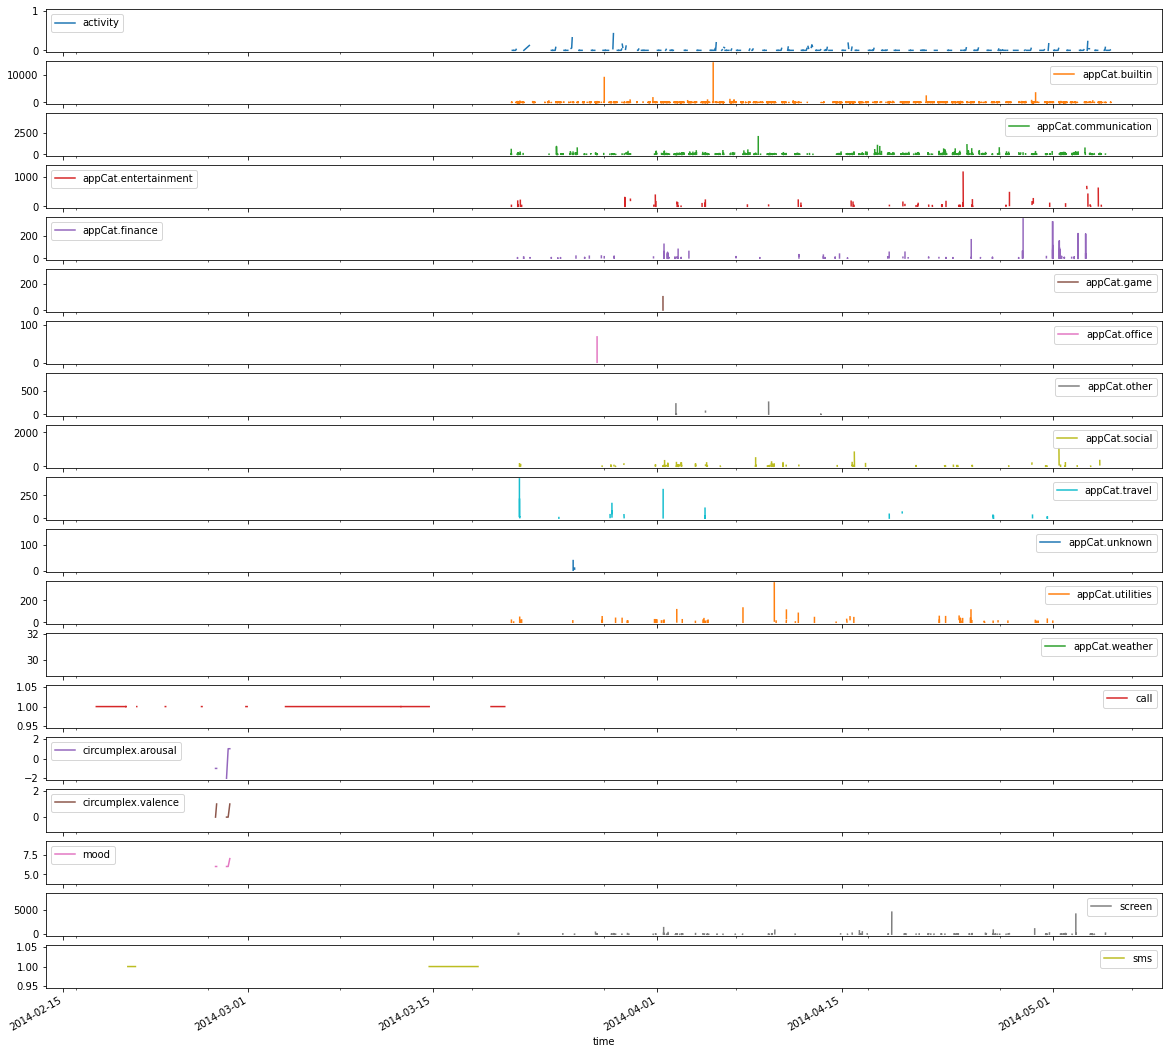

In [506]:
group_dataset.get_group('AS14.01').plot(subplots=True, figsize=(20, 20))

Preeprocessing

In [507]:
#Verify if more than 30% of the data  is missing
def check_missing_data(data, pass_p=30):
    """Returns a list with the attributes that have more than 30% of theier data missing"""
    missing_attributes = list()
    missing_values = data.isna().sum() * 100 / len(data)

    for attribute in unique_attributes:
        if missing_values[attribute] > pass_p:
            missing_attributes.append(attribute)
            
    return missing_attributes

In [508]:
def freq_miss_atr(nr_miss_atr: dict, list_miss_atr: list):
    """
    Increments thee number of times a attribute has been found in the missing atributes list 
    obtained from  the function *check_missing_data*
    """
    for attribute in list_miss_atr:
        if attribute not in nr_miss_atr:
            nr_miss_atr[attribute] = 1
        else:
            nr_miss_atr[attribute] += 1

In [509]:
def cut_outliers(data, cutoff_value = 10):
    """Remove the data row if too many of the attributes are missing"""
    data["cut"] = resampled_data.isnull().sum(axis=1) > cutoff_value
    data.drop(data[data.cut].index, inplace=True)

In [510]:
freq_of_miss_atrtributes = dict() #Dictionary that contains the number of times an attribute has more than 30% of te data missing
list_of_miss_atr_and_id = list() #List with all the ids and the attributes that have more than 30% of the data missing
preprocesed_data = dict() #Dictionary that contains the new DataFrame after the preeprocessing has been done

for id in unique_ids:
    resampled_data = group_dataset.get_group(id).resample('D').mean() #Resample the data and mean over each day

    resampled_data["call"] = resampled_data["call"].fillna(0) #Fill all the missing values with 0
    resampled_data["sms"] = resampled_data["sms"].fillna(0) #Fill all the missing values with 0

    resampled_data.dropna(subset=["mood"], inplace=True) #Discard any missing values from the mood

    list_miss_atr = check_missing_data(resampled_data) #Obtain the list of all the missing attributes for the current patient
    list_of_miss_atr_and_id.append((id, list_miss_atr)) #Add the patient and the list of missing attributes to the specific list
    freq_miss_atr(freq_of_miss_atrtributes, list_miss_atr) #Inrement the values of the dictionary the contains the missing attributes
    
    cut_outliers(resampled_data) #Remove all the temporal outliers

    preprocesed_data[id] = resampled_data #Save the preprocesed data in the dictionary with the key as the id

In [511]:
freq_of_miss_atrtributes #Verify the frequency of the missing attributes

{'activity': 1,
 'appCat.builtin': 1,
 'appCat.communication': 3,
 'appCat.entertainment': 13,
 'appCat.finance': 27,
 'appCat.game': 24,
 'appCat.office': 26,
 'appCat.other': 4,
 'appCat.social': 11,
 'appCat.travel': 26,
 'appCat.unknown': 25,
 'appCat.utilities': 24,
 'appCat.weather': 27,
 'screen': 1}

In [512]:
# list_of_miss_atr_and_id

In [513]:
def del_id(id_and_atr, dict_of_atr, pass_val = 1):
    """
    Verify which attibutes have a frequency smaller than the pass value and adds the attribte id to the ids delete list.
    Return the list with all lthe patients that need to be removed from the DataFrame
    """
    id_to_del = list()
    for atr in dict_of_atr:
        if dict_of_atr[atr] <= pass_val:
            for id, del_atr in id_and_atr:
                if atr in del_atr and id not in id_to_del:
                    id_to_del.append(id)
    return id_to_del

In [514]:
ids_to_delete = del_id(list_of_miss_atr_and_id, freq_of_miss_atrtributes)
ids_to_delete

['AS14.26']

In [515]:
def del_key(dict_of_freq, pass_val=1):
    """Deletes the keys that have a smaller value than the specified pass value"""
    delete_keys = list()

    for key in dict_of_freq:
        if dict_of_freq[key] <= pass_val:
            delete_keys.append(key)

    for key_to_delete in delete_keys:
        del dict_of_freq[key_to_delete]
        
    return dict_of_freq

In [516]:
freq_of_miss_atrtributes = del_key(freq_of_miss_atrtributes)
freq_of_miss_atrtributes

{'appCat.communication': 3,
 'appCat.entertainment': 13,
 'appCat.finance': 27,
 'appCat.game': 24,
 'appCat.office': 26,
 'appCat.other': 4,
 'appCat.social': 11,
 'appCat.travel': 26,
 'appCat.unknown': 25,
 'appCat.utilities': 24,
 'appCat.weather': 27}

In [517]:
#Delete the ids that are in the ids_to_delete list from the preprocesd data
for id in ids_to_delete:
    del preprocesed_data[id]
    unique_ids = np.delete(unique_ids,  np.where(unique_ids == id))

In [518]:
for id_key in preprocesed_data:
    #Delete all the columns that have to manny missing value in the DataFrame
    preprocesed_data[id_key].drop(columns=freq_of_miss_atrtributes.keys(), inplace=True)
    #Replace all the missing value with the median values for the remaining columns
    preprocesed_data[id_key].fillna( preprocesed_data[id_key].median(), inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f450fe29150>,
      dtype=object)

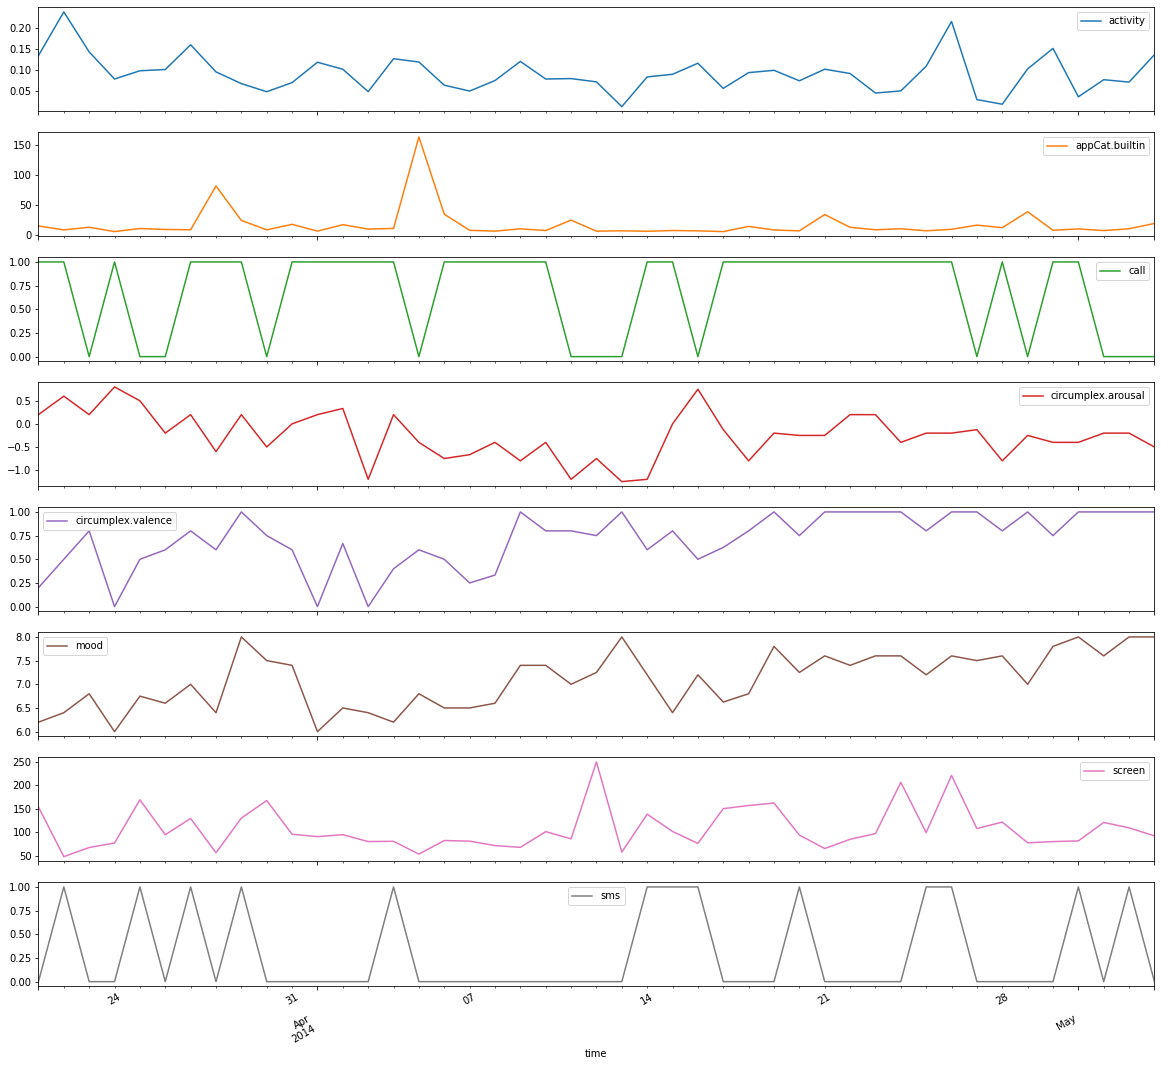

In [519]:
preprocesed_data['AS14.01'].plot(subplots=True, figsize=(20, 20))

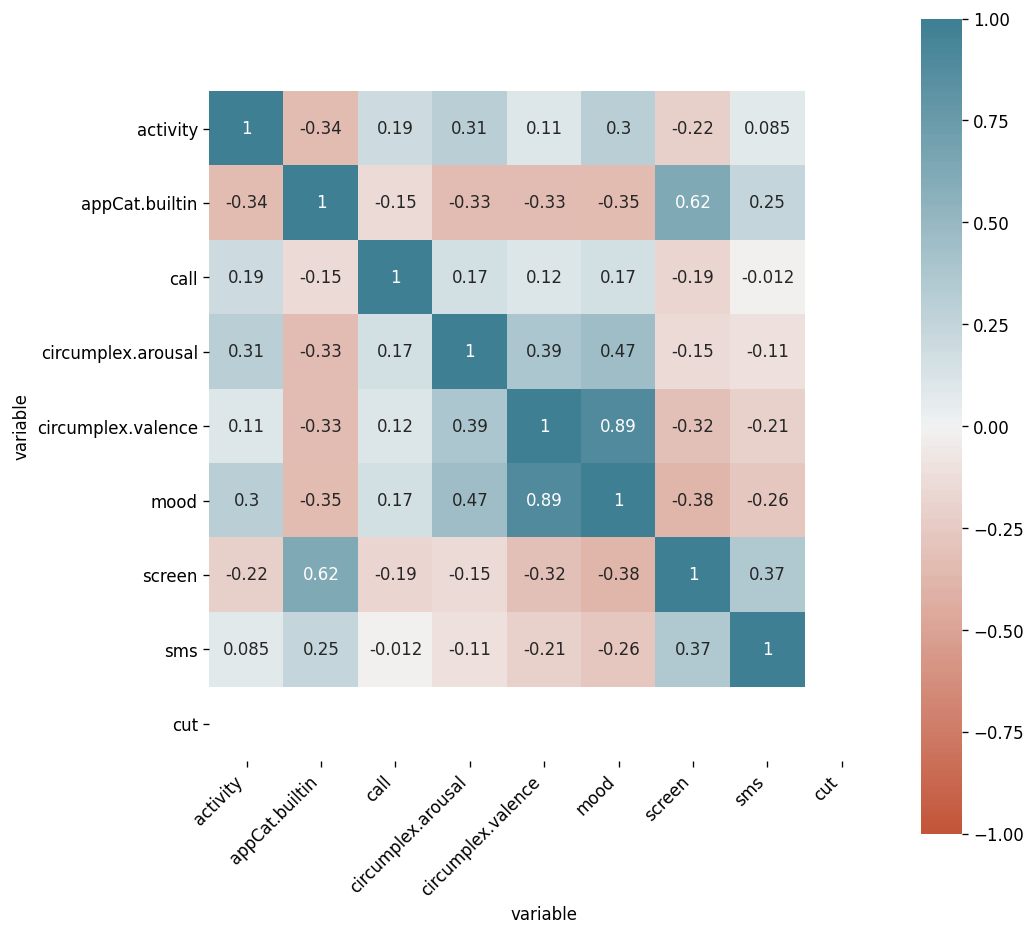

In [520]:
#Create a corelation matrix to see the corelation between each attribute
plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120})

corr = preprocesed_data['AS14.05'].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [521]:
#Delete the attributes that have a big corelation or are not useful
for id_key in preprocesed_data:
    preprocesed_data[id_key].drop(columns=["circumplex.valence", "cut"], inplace=True)

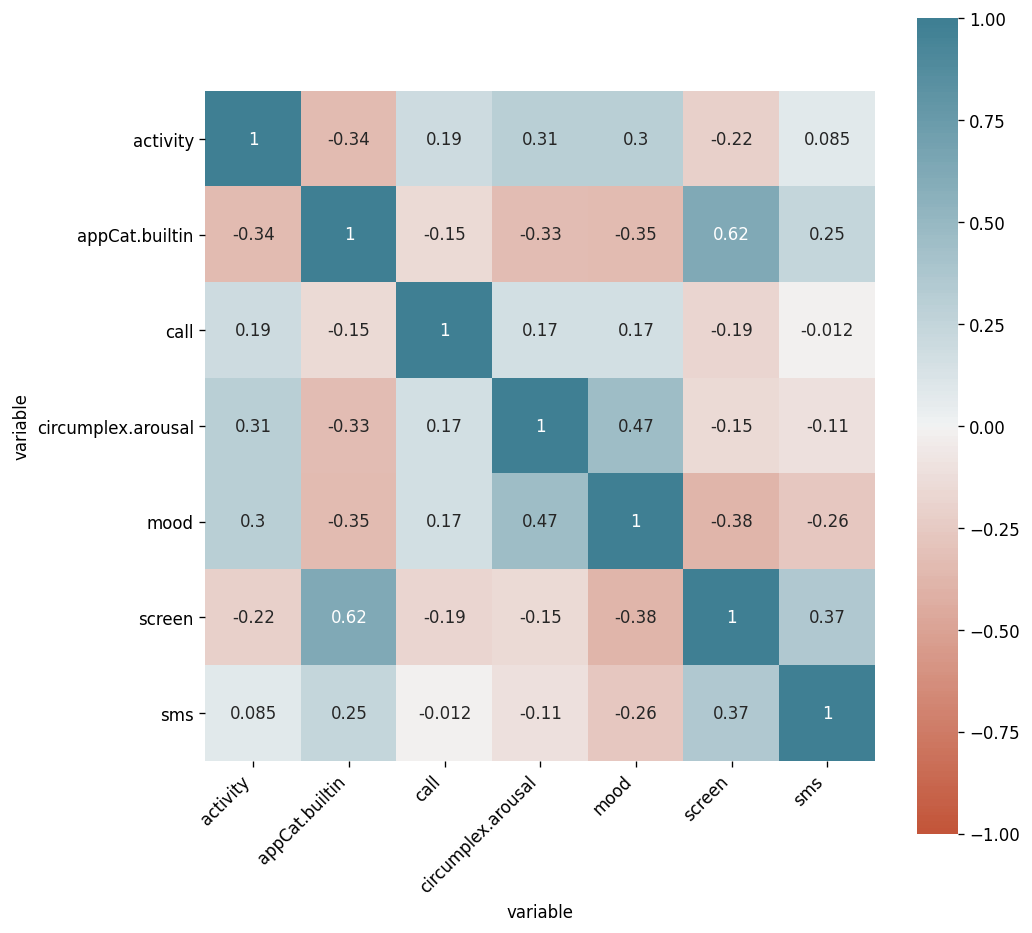

In [522]:
#Create a new corelation matrix using the new dataset
plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120})

corr = preprocesed_data['AS14.05'].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Models

Create test and train data

In [523]:
def separate_data(data, p=0.3):
    """Separate the data into training data and test data, based on a specified procentage"""
    test_data_len = int(len(data) * p)
    train_data = data[:-test_data_len]
    test_data = data[-test_data_len:]
    return train_data, test_data

In [524]:
train_data_ids = dict() #Dictionary containg the training DataFrame for each patient
test_data_ids = dict() #Dictionary containg the testing DataFrame for each patient

for id in unique_ids:
    train_data_ids[id], test_data_ids[id] = separate_data(preprocesed_data[id])

Baselines

In [525]:
def create_baseline(test_data, b_type="base", sliding_w=5, p_chance=0.3):
    """
    Funtions that create a simple baseline based on the test_data, there are three different optiond for the baseline
    base: the baseline is v=created by considering that the curent day value is the same as the previous day value

    ma: the curent day value is based on the mean of a sliding window of the previous day value

    prob: the curent day is based on the previous day value, but there is a probability 
    that to that value will be added a number extracted from a normal distribution obtained using np.uniform(-0.5, 0.5)
    """
    if b_type == "base":
        baseline = np.repeat(test_data[1], len(test_data))

    if b_type == "ma":
        baseline = test_data[-sliding_w:]
        for _ in range(len(test_data)):
            baseline = np.append(baseline, np.mean(baseline[-sliding_w:]))
        baseline = baseline[-len(test_data):]
    
    if b_type == "prob":
        baseline = np.array([test_data[1]])
        while len(baseline) < len(test_data):
            if np.random.choice([True, False], 1, p=[p_chance, 1-p_chance]):
                change = np.random.uniform(-0.5, 0.5, 1)
                baseline = np.append(baseline, baseline[-1:] + change)
            else:
                baseline = np.append(baseline, baseline[-1:])

    return baseline

In [526]:
base_baseline = dict()
ma_baseline = dict()
prob_baseline = dict()

for id in unique_ids:
    base_baseline[id] = create_baseline(test_data_ids[id]["mood"].values, b_type="base")
    ma_baseline[id] = create_baseline(test_data_ids[id]["mood"].values, b_type="ma")
    prob_baseline[id] = create_baseline(test_data_ids[id]["mood"].values, b_type="prob",)

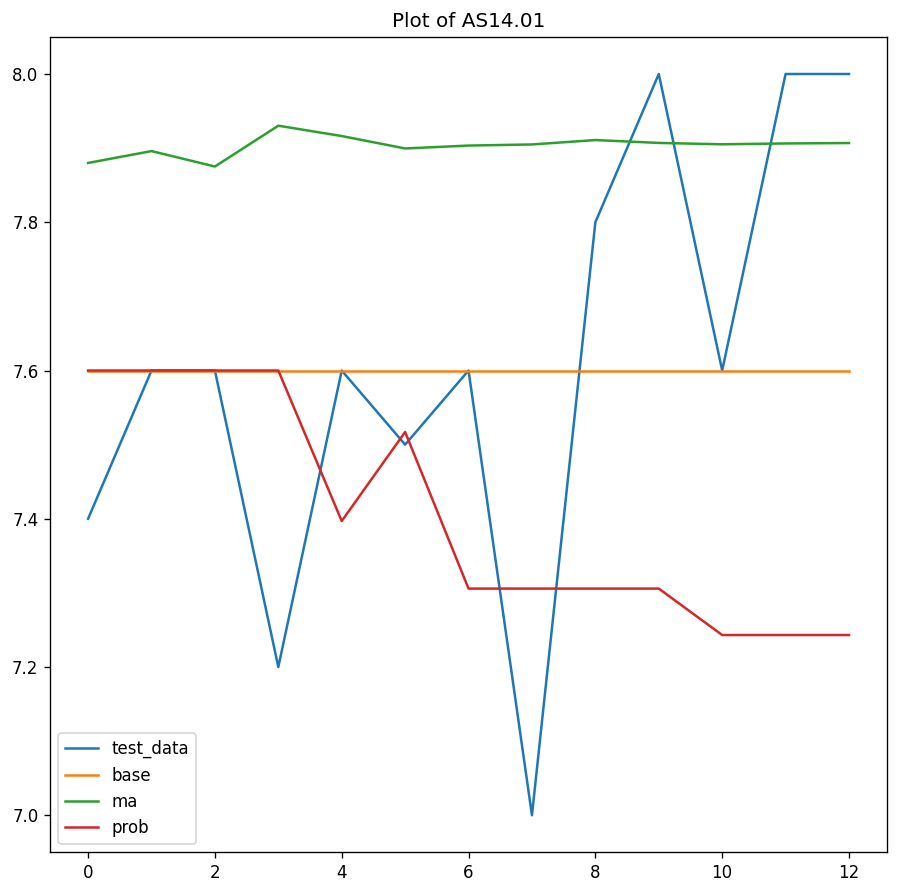

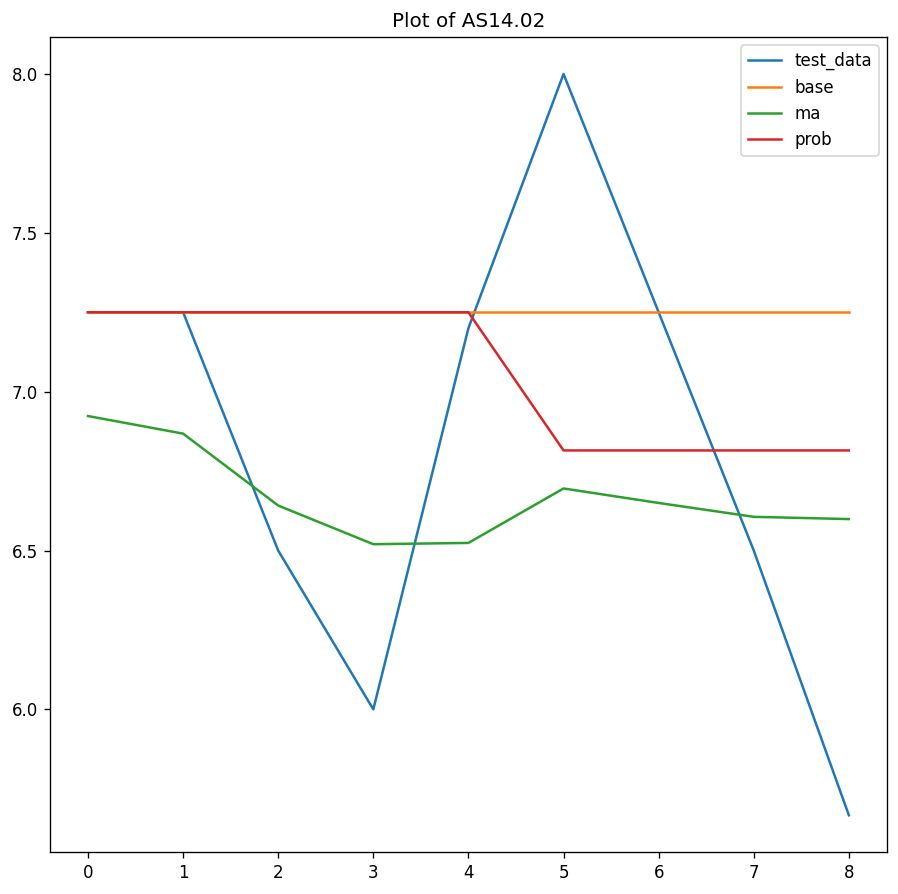

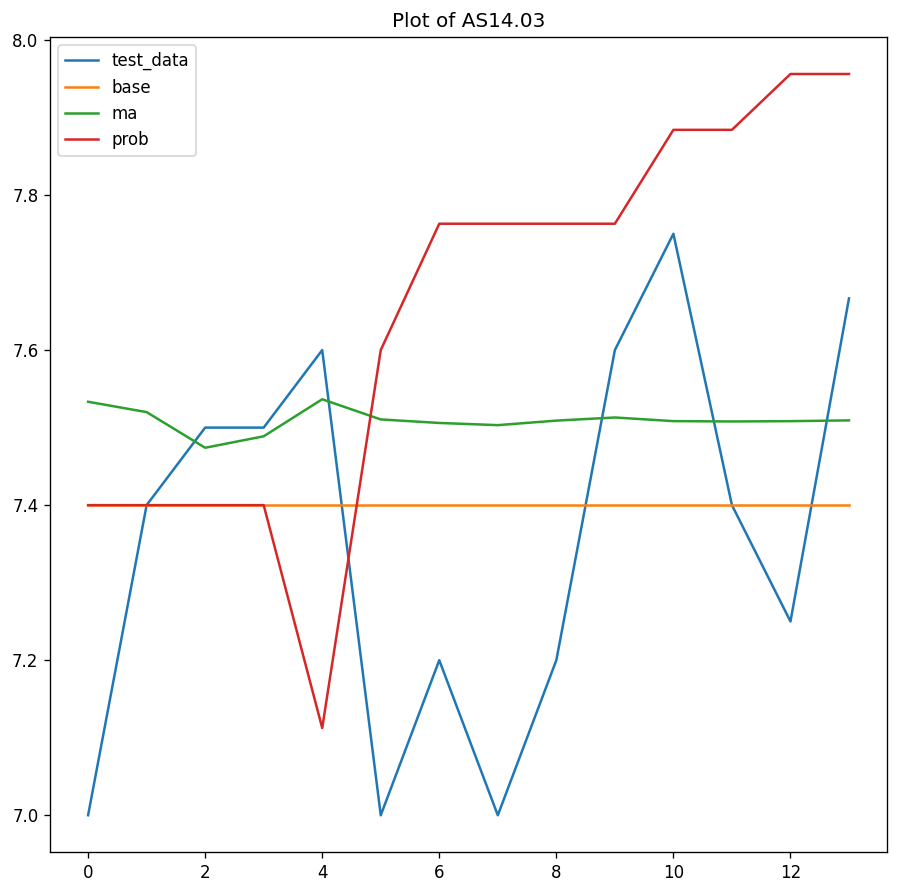

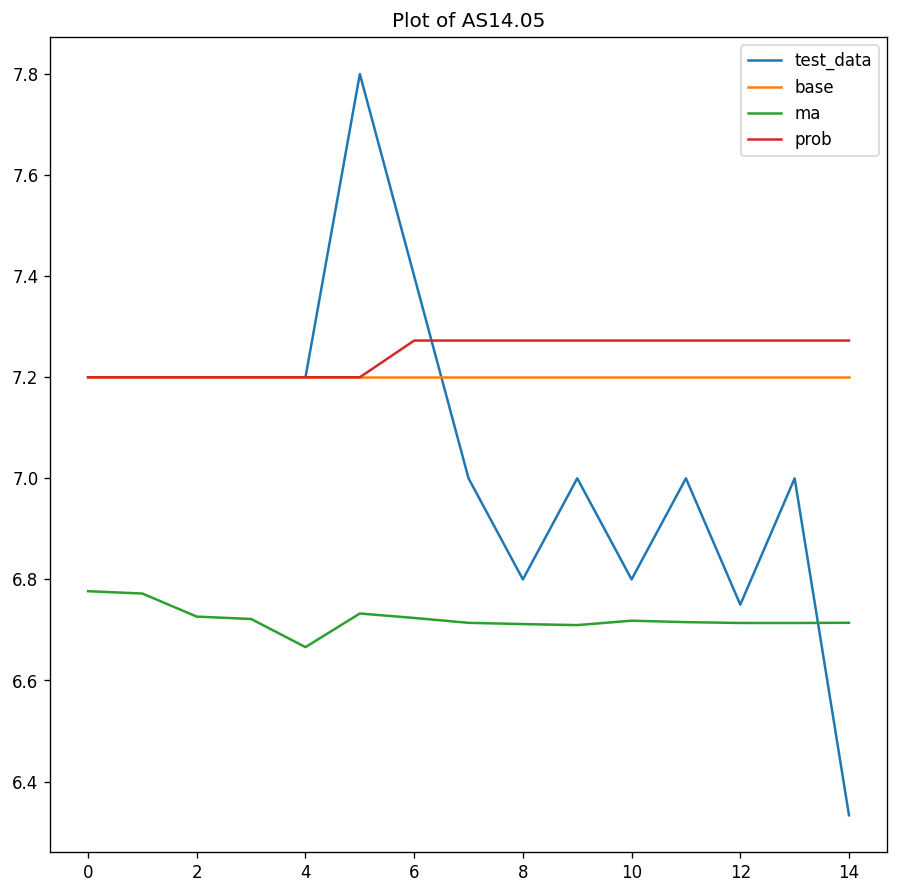

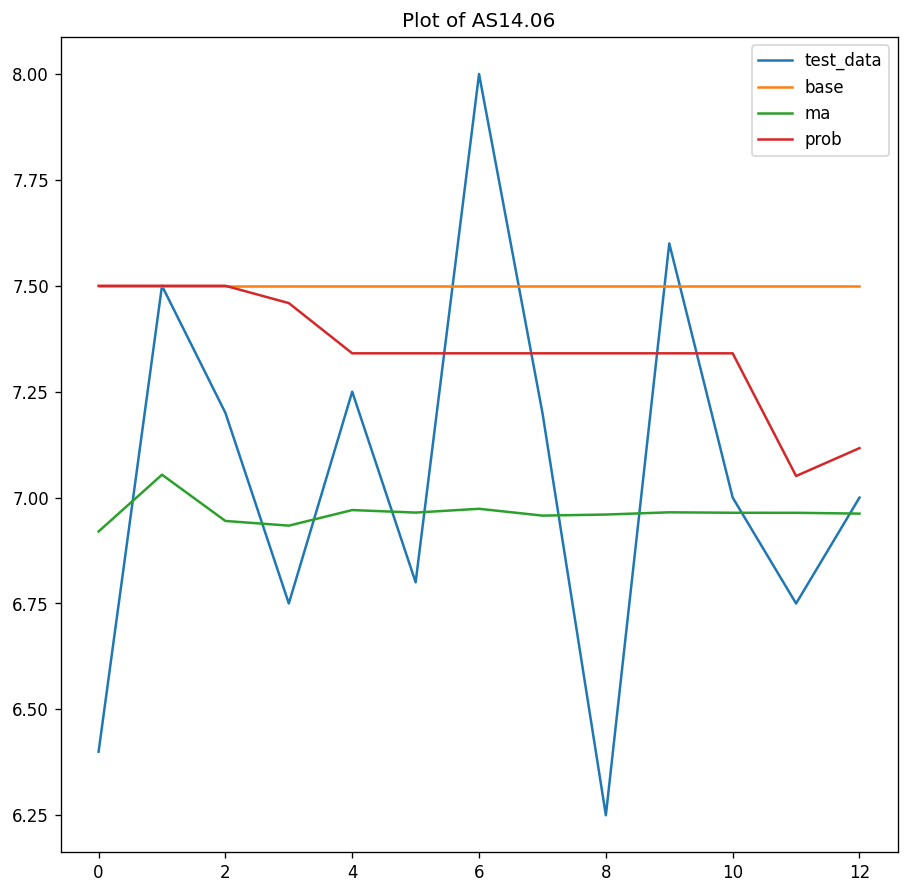

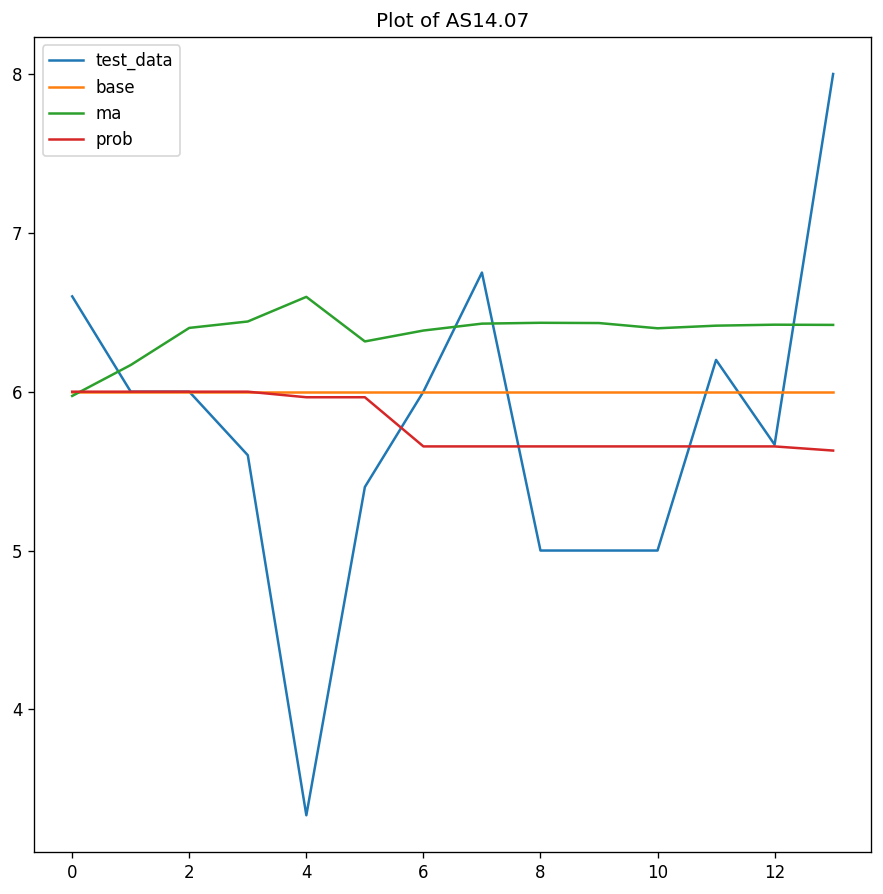

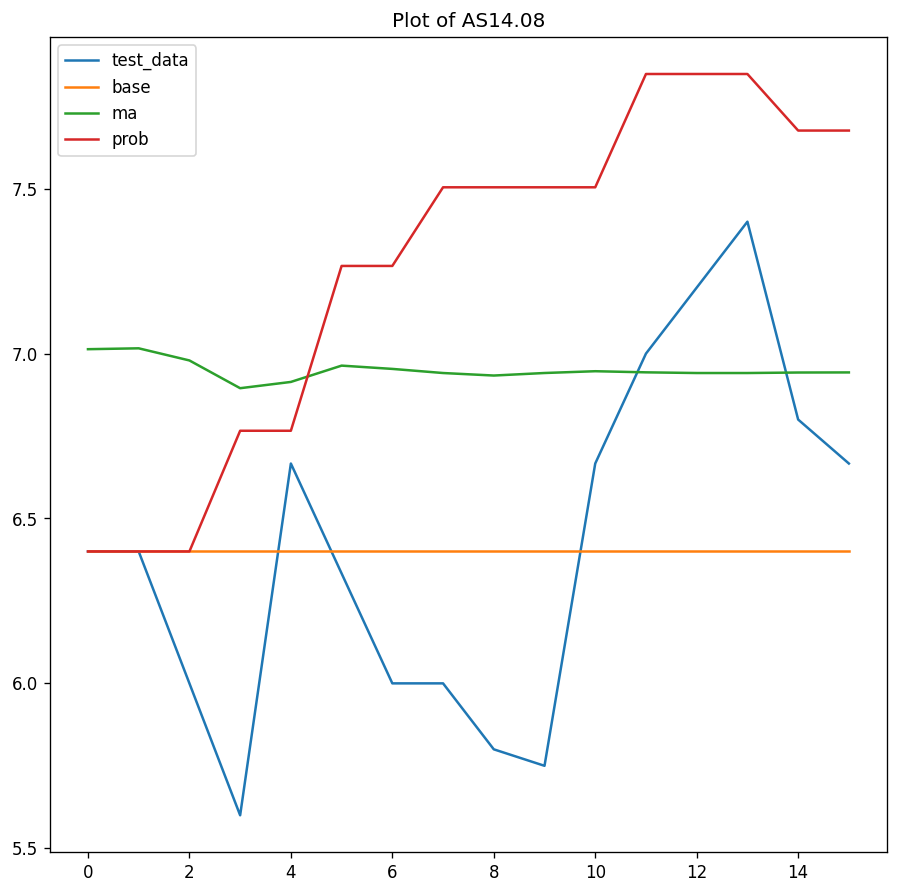

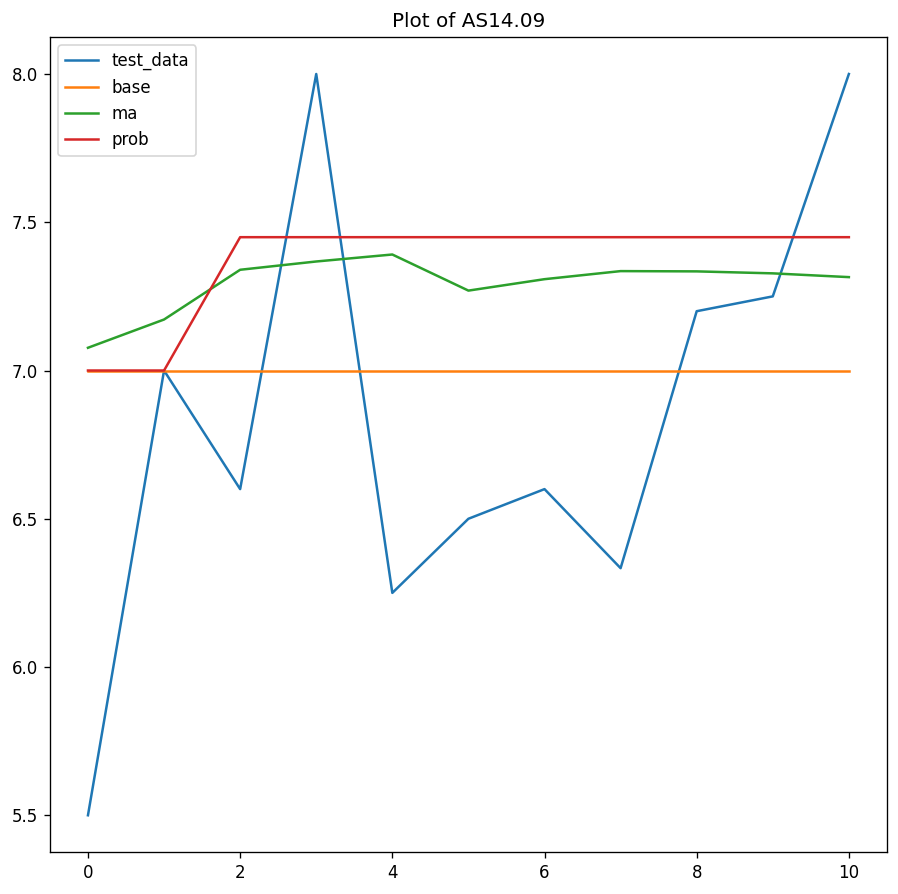

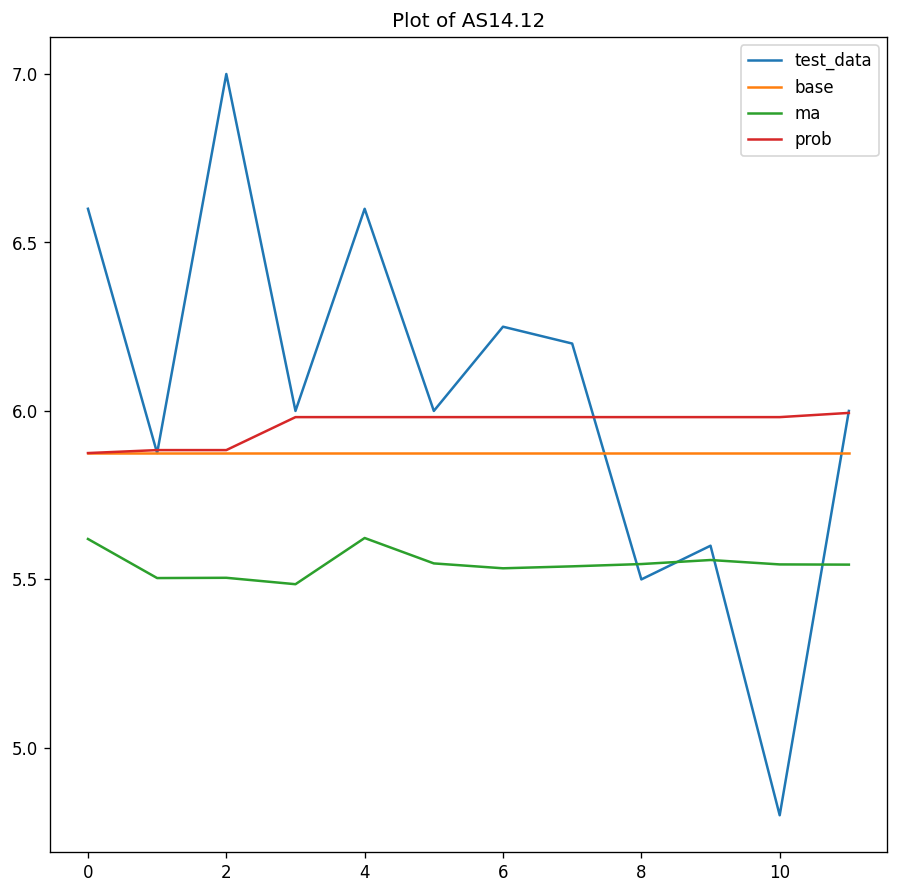

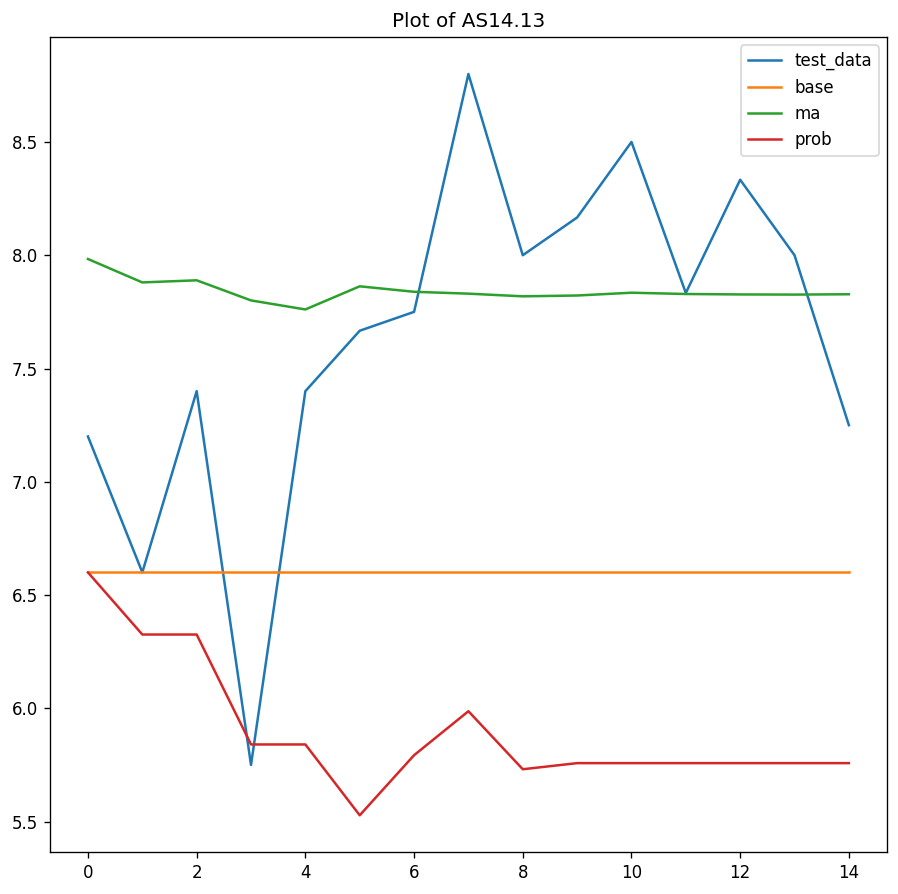

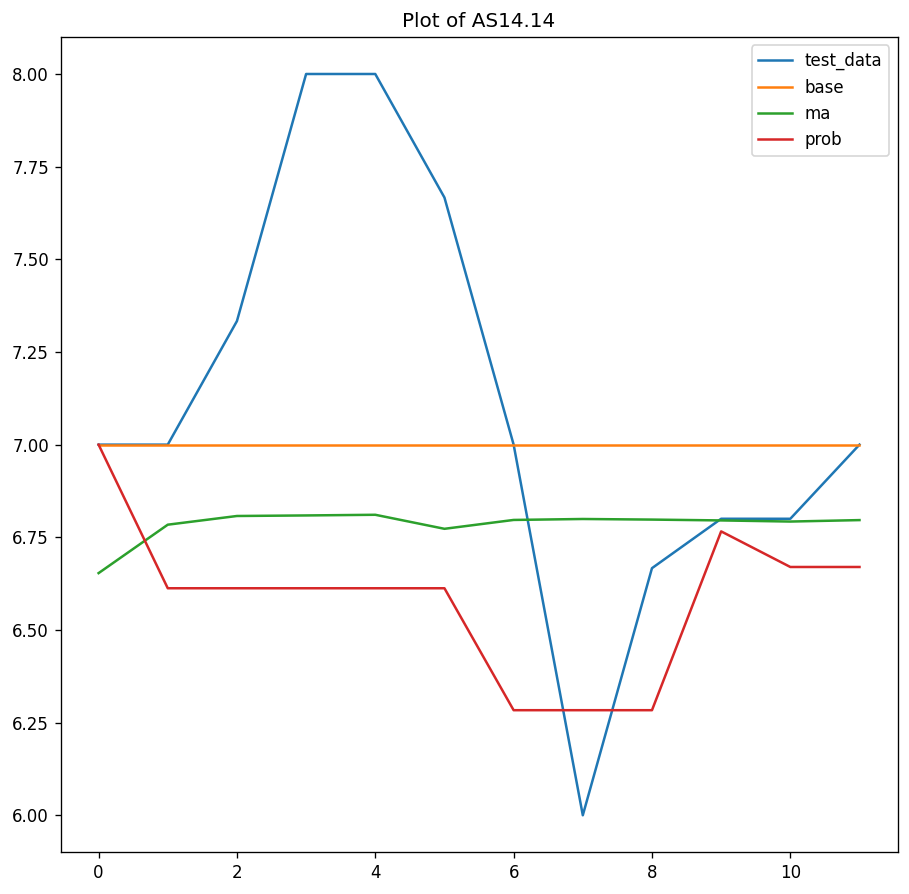

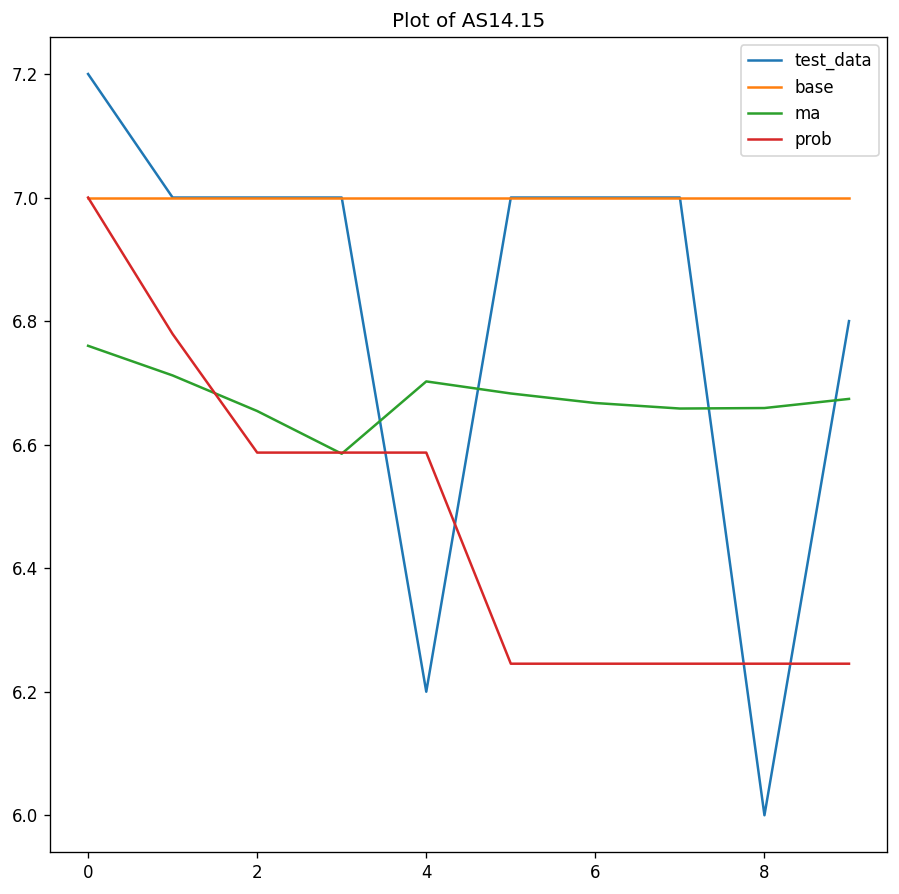

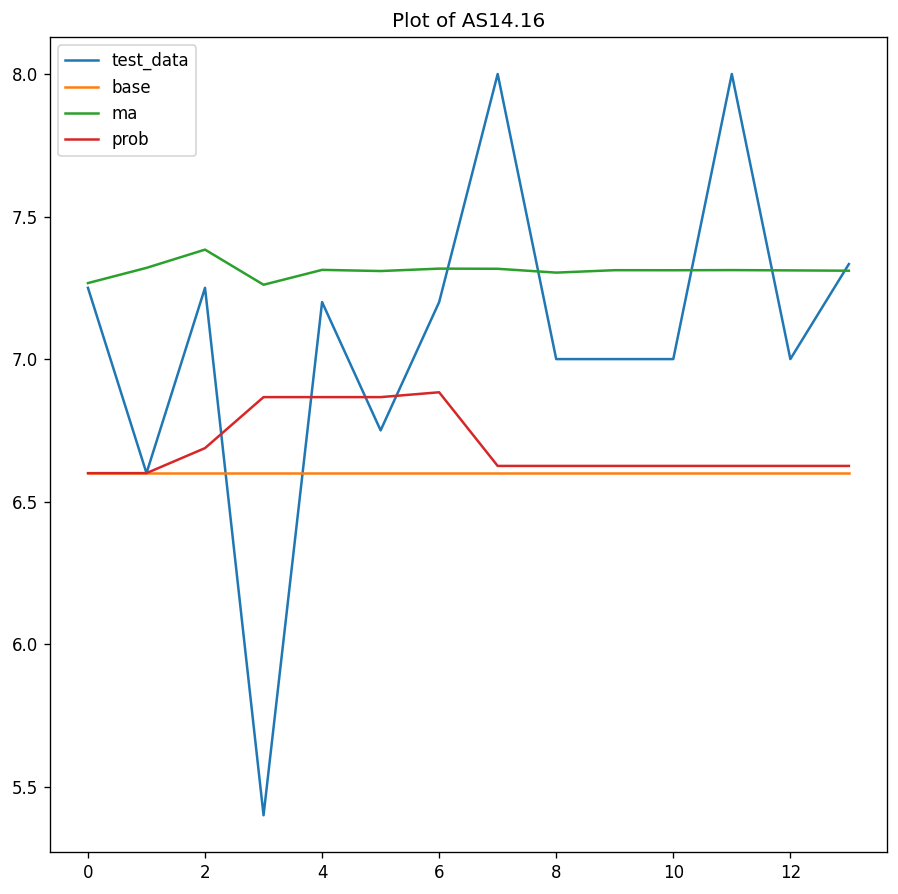

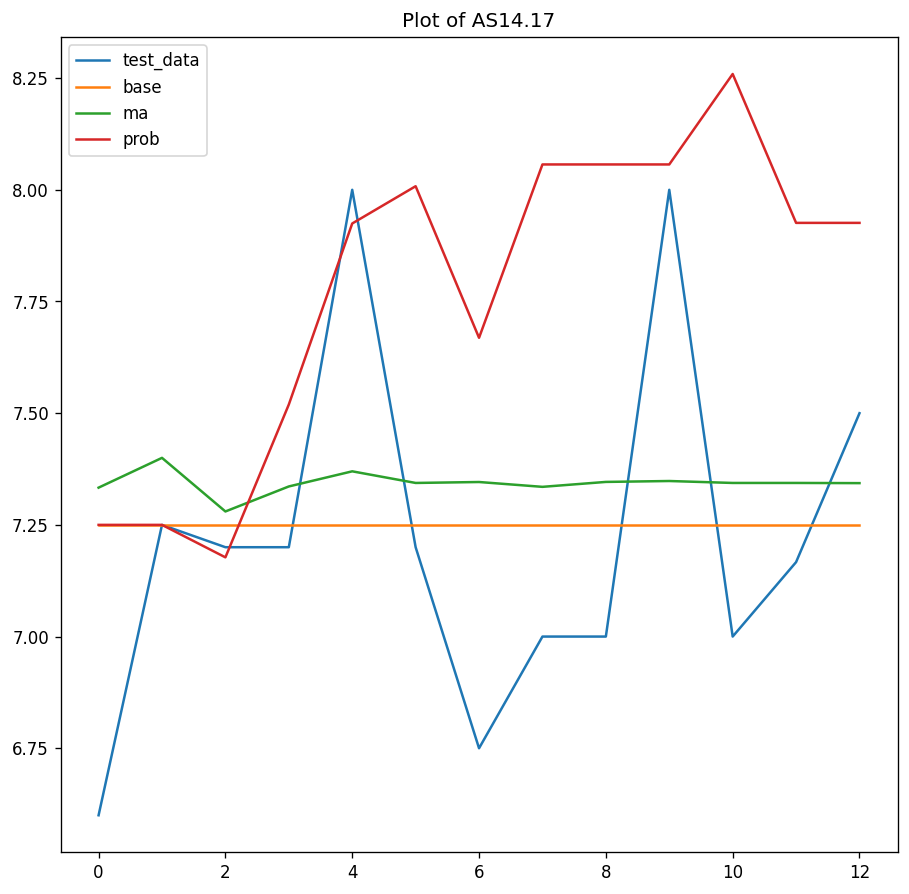

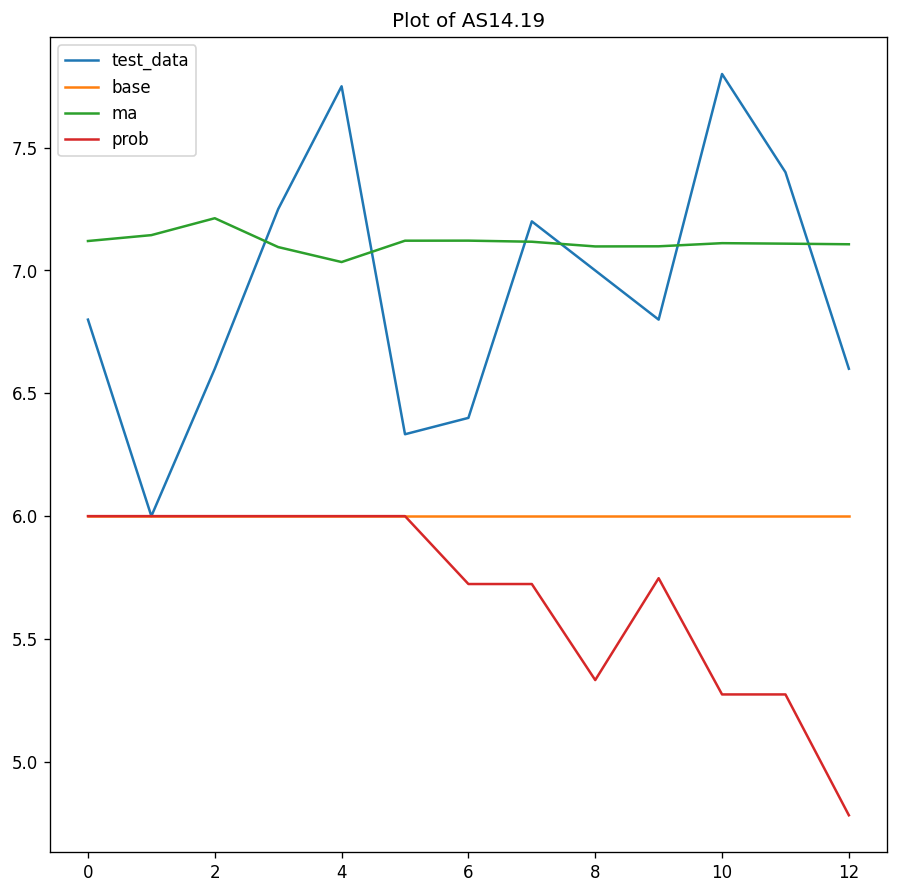

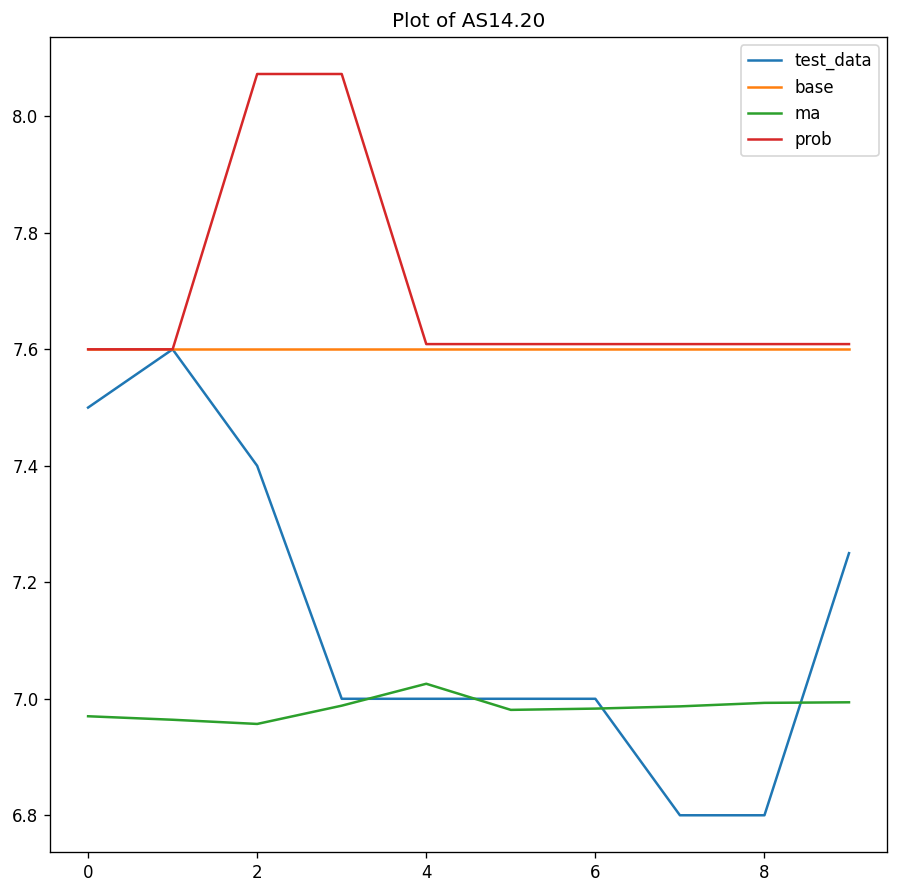

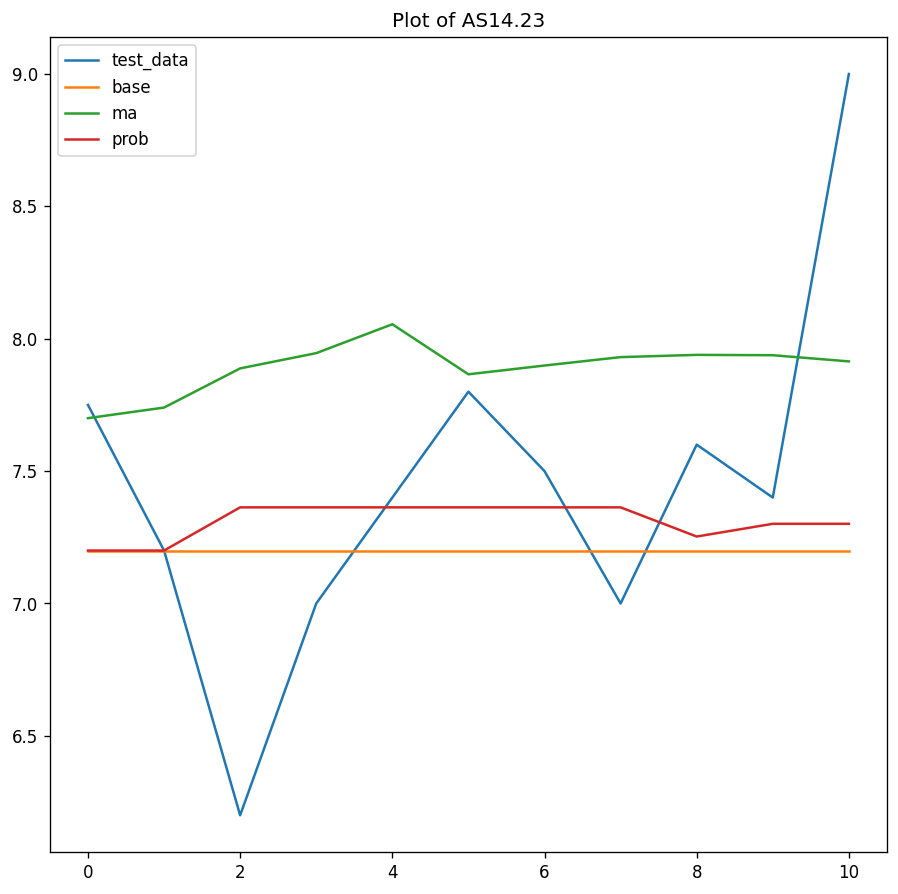

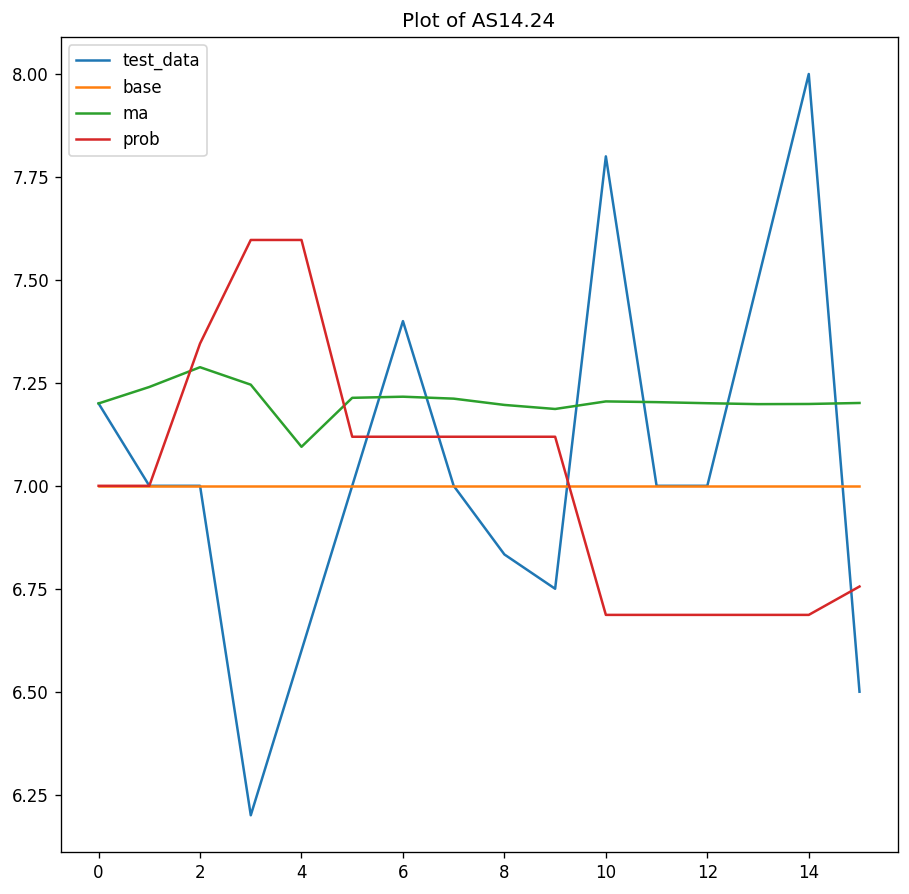

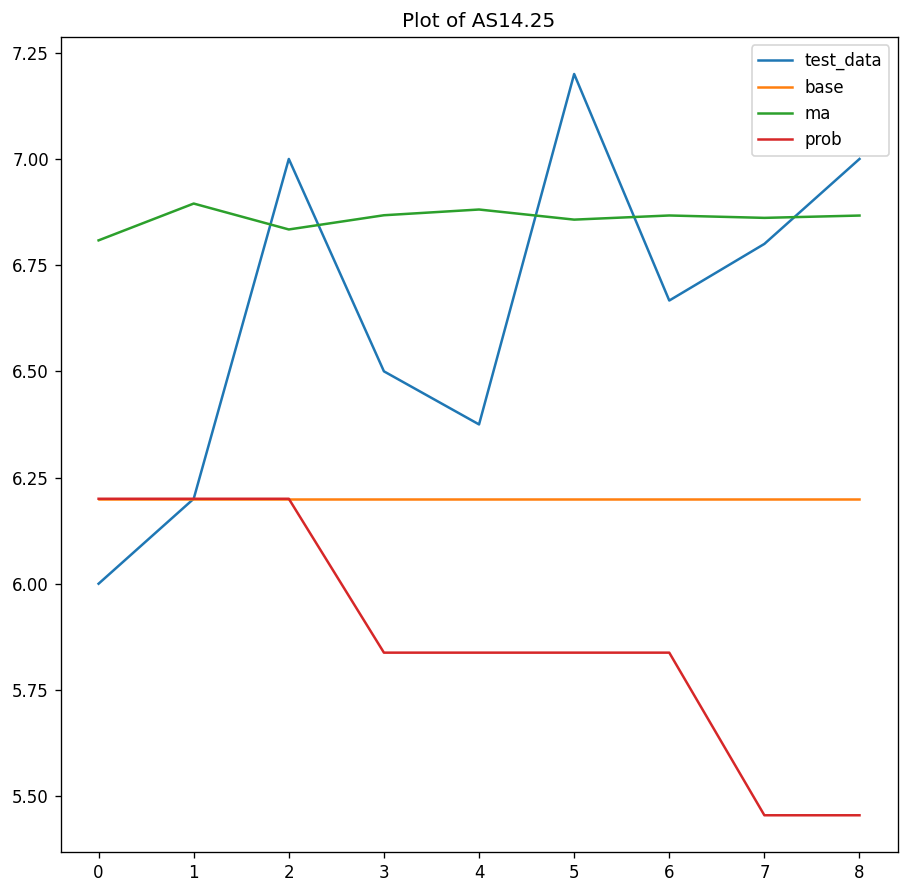

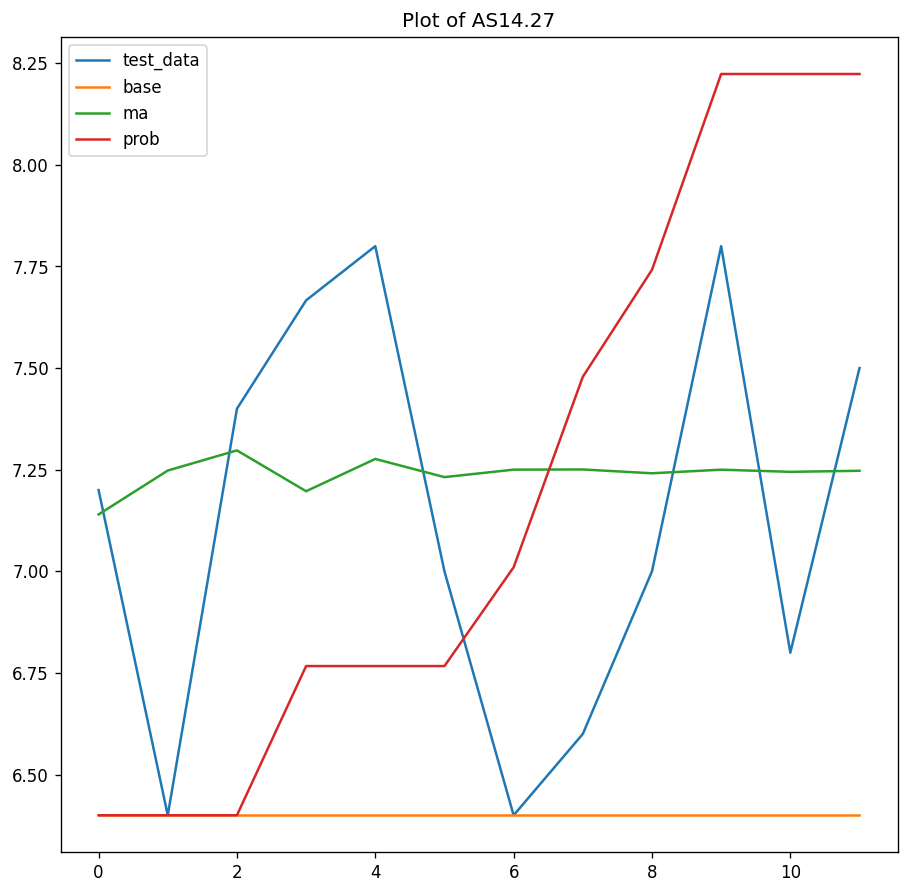

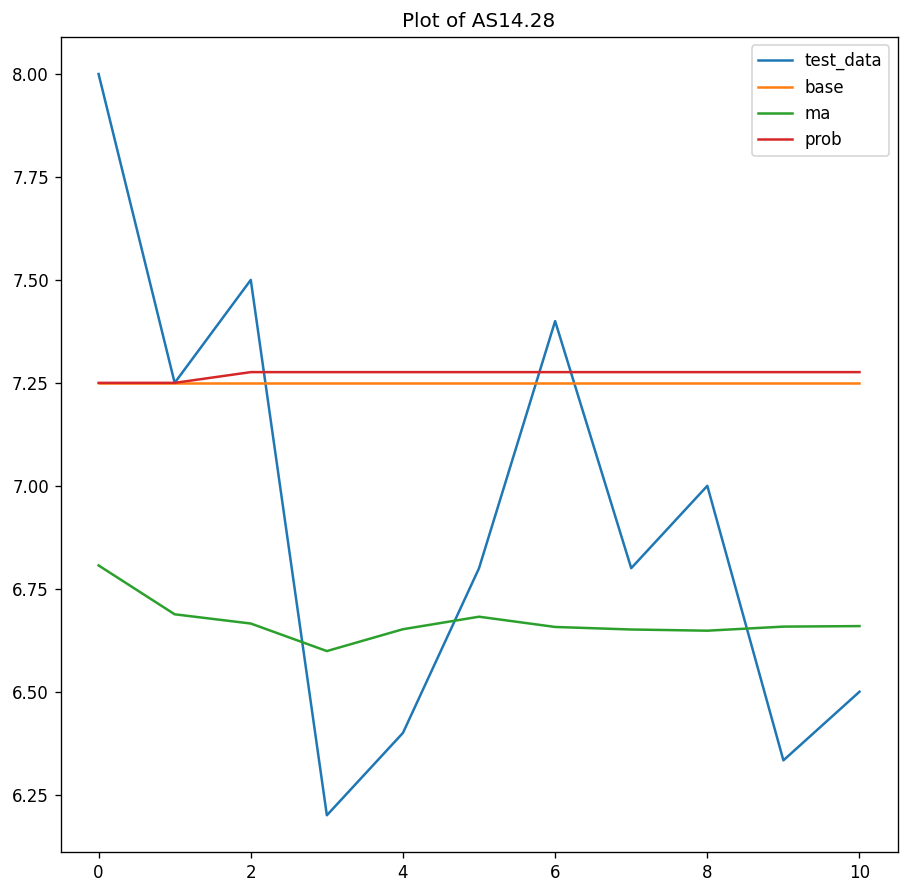

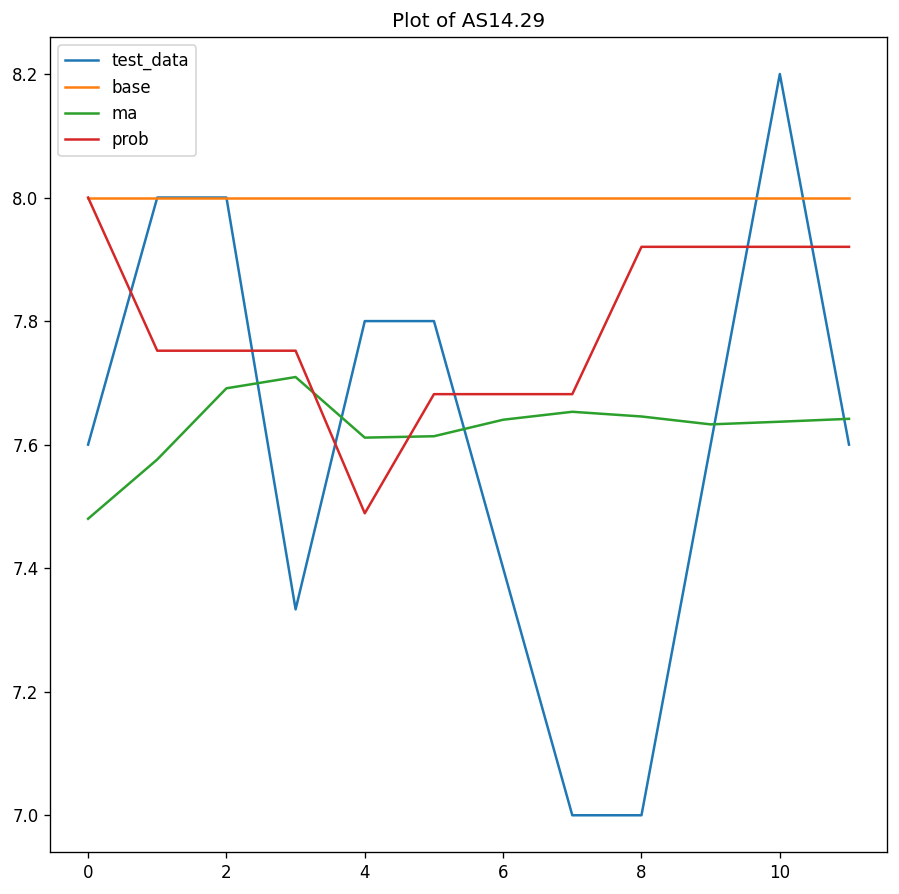

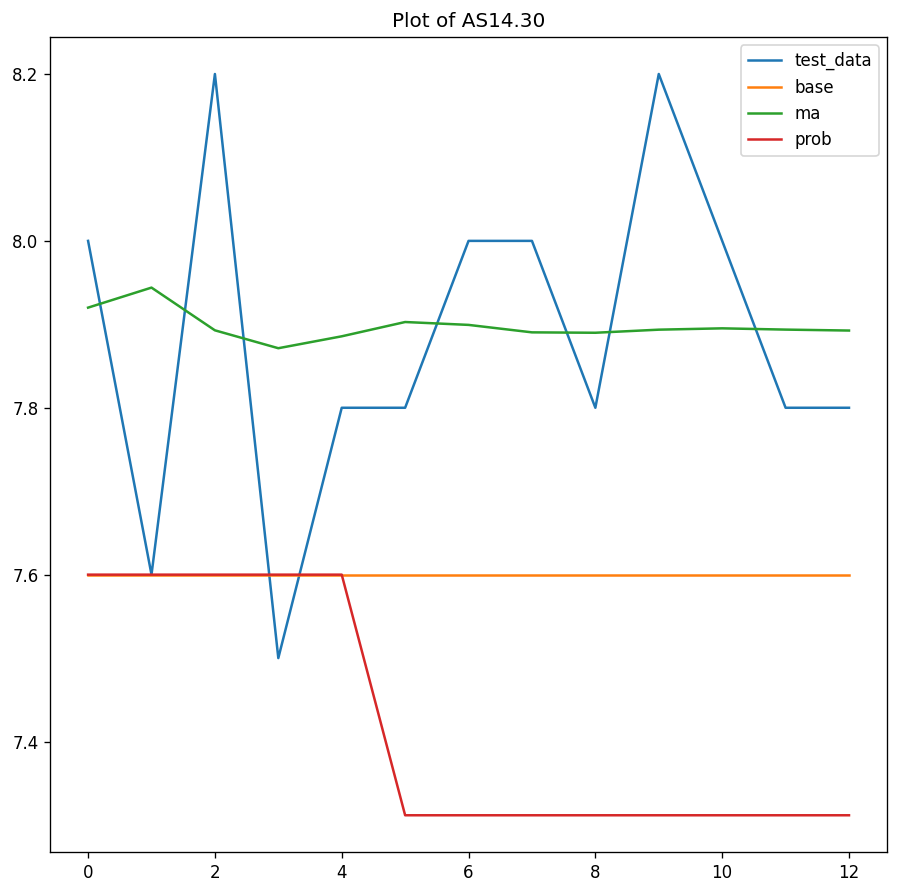

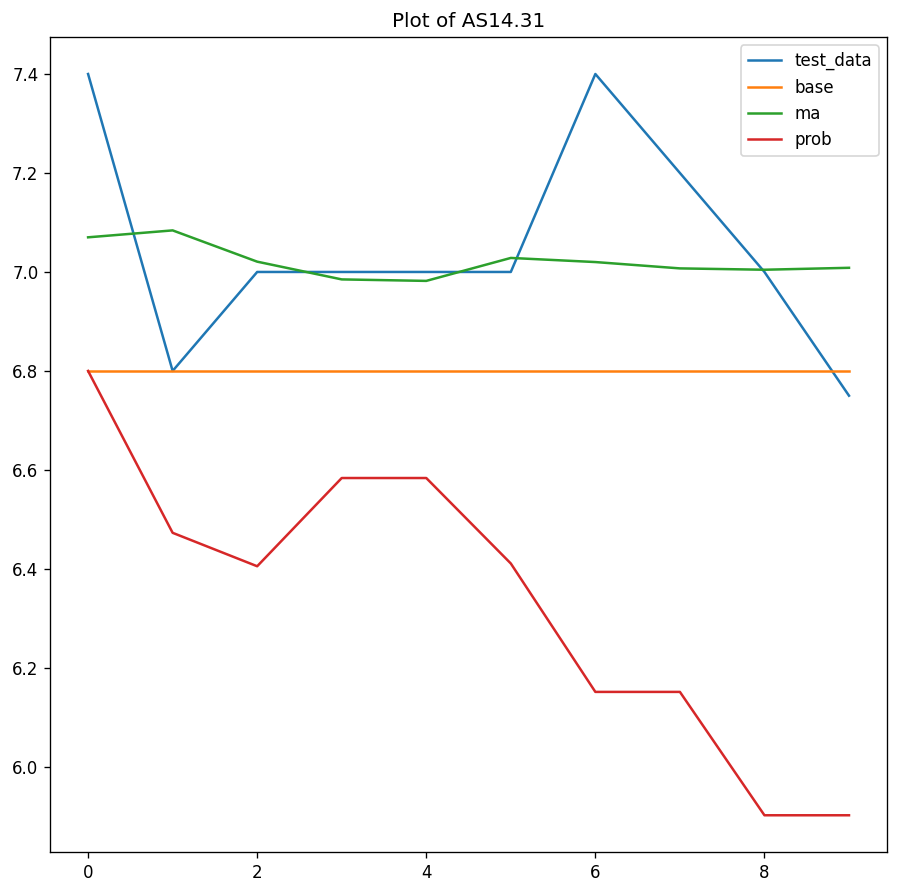

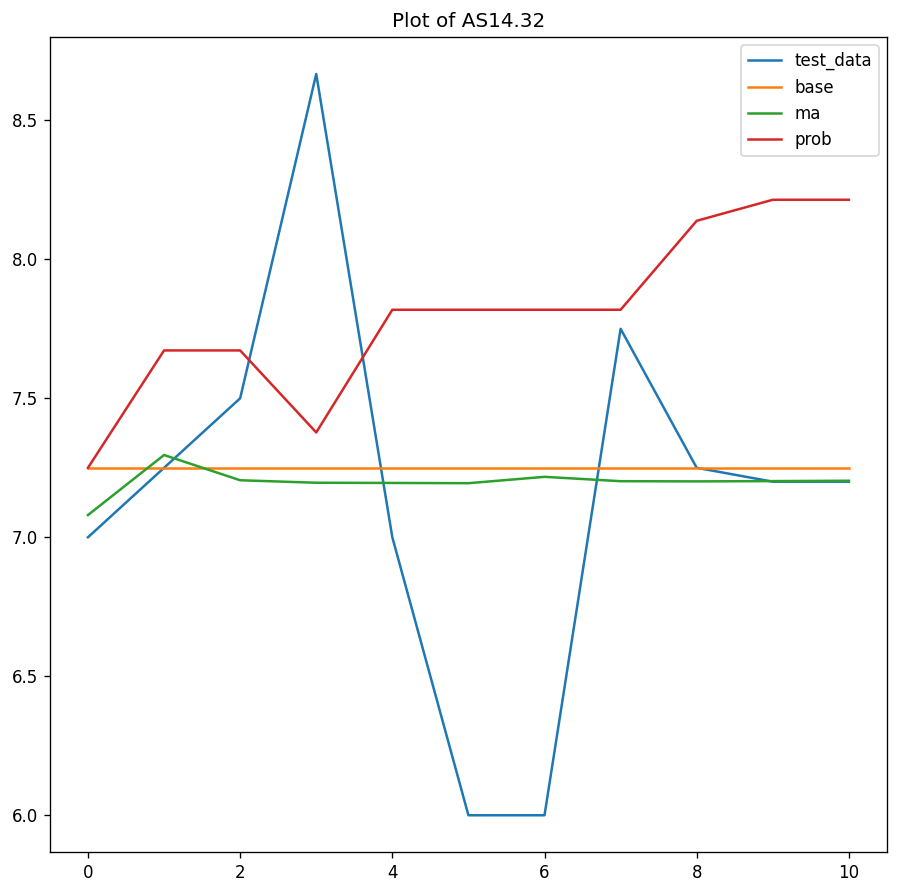

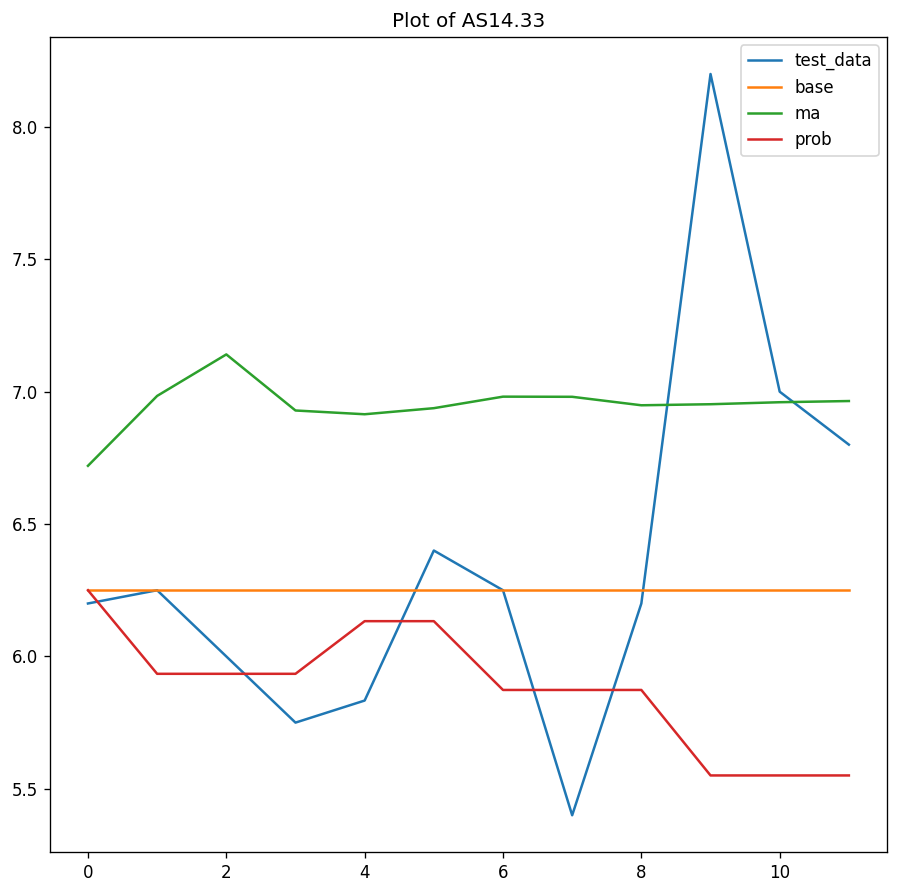

In [527]:
for id in unique_ids:

    plt.plot(test_data_ids[id]["mood"].values, label="test_data")
    plt.plot(base_baseline[id], label="base")
    plt.plot(ma_baseline[id], label="ma")
    plt.plot(prob_baseline[id], label="prob")
    plt.title(f"Plot of {id}")
    plt.legend()

    plt.show()

In [726]:
def forecast_accuracy(actual_data, predicted_data, verif_corr=True):
    """
    Returns a dictionary that contains the forecast accuracy
    MAPE: Mean Absolute Percentage Error
    corr: Correlation between the Actual and the Forecast
    MAD: Mean absolute deviation 
    """
    mape = np.mean(np.abs(predicted_data - actual_data)/np.abs(actual_data)) * 100
    mape = round(mape, 2)
    if verif_corr:
        corr = np.corrcoef(predicted_data, actual_data)[0,1]
        corr = round(corr, 2)
    mad = np.mean(predicted_data - actual_data)
    mad = round(mad, 2)
    if verif_corr:
        return mape, mad, corr
    else:
        return mape, mad

In [727]:
#Creat a list that contains all the accuracy estimators for the three baselines
all_baselines_accuracys = list()

for id in unique_ids:
    base_accuracy = forecast_accuracy(test_data_ids[id]["mood"].values, base_baseline[id]) #Accuracy estimators for the base baselline
    ma_accuracy = forecast_accuracy(test_data_ids[id]["mood"].values, ma_baseline[id]) #Accuracy estimators for the ma baselline
    prob_accuracy = forecast_accuracy(test_data_ids[id]["mood"].values, prob_baseline[id]) #Accuracy estimators for the prob baselline
    #Add al the accuracy estimators for each baseline to a list in a specific order. They are combined in a tuple
    all_baselines_accuracys.append((base_accuracy[0], ma_accuracy[0], prob_accuracy[0], base_accuracy[1], ma_accuracy[1], prob_accuracy[1], base_accuracy[2], ma_accuracy[2], prob_accuracy[2]))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [728]:
#Create a Pandas DataFrame from the accuracy etimators
base_baseline_accuracy = pd.DataFrame(all_baselines_accuracys, columns=["MAPE_base", "MAPE_ma", "MAPE_prob", "MAD_base", "MAD_ma", "MAD_prob", "corr_base", "corr_ma", "corr_prob",], index=unique_ids)
base_baseline_accuracy

MAPE_base  MAPE_ma  MAPE_prob  ...  corr_base  corr_ma  corr_prob
AS14.01       2.75     4.58       4.46  ...        0.0    -0.02      -0.46
AS14.02       9.10     8.08       8.78  ...        NaN     0.48      -0.01
AS14.03       2.91     3.21       5.27  ...       -0.0    -0.13       0.01
AS14.05       3.60     5.38       4.10  ...       -0.0     0.25      -0.62
AS14.06       7.95     5.13       6.39  ...        NaN     0.49       0.07
AS14.07      15.18    20.14      14.68  ...        NaN    -0.42      -0.21
AS14.08       6.75    10.32      13.60  ...        NaN     0.05       0.45
AS14.09       9.17    10.76      11.31  ...        NaN     0.47       0.39
AS14.12       7.47    10.02       7.10  ...        NaN     0.18      -0.47
AS14.13      14.70     8.18      22.06  ...        0.0    -0.13      -0.33
AS14.14       5.48     6.49       7.64  ...        NaN     0.10       0.32
AS14.15       3.53     5.62       6.86  ...        NaN     0.08       0.30
AS14.16       9.06     6.72       8.58  ...       -0.0     0.41      -0.42
AS14.17       4.10     4.79       8.12  ...        NaN     0.26       0.28
AS14.19      12.77     7.35      17.31  ...        NaN    -0.56      -0.22
AS14.20       6.67     3.16       8.06  ...        0.0    -0.61       0.10
AS14.23       6.48     9.18       6.27  ...        NaN    -0.05      -0.27
AS14.24       4.40     5.65       7.29  ...        NaN     0.05      -0.62
AS14.25       7.03     5.69      11.84  ...        NaN     0.04      -0.49
AS14.27       9.81     6.26      10.20  ...       -0.0    -0.00       0.12
AS14.28       7.98     6.43       8.17  ...        NaN     0.75      -0.61
AS14.29       5.76     4.19       5.10  ...        NaN    -0.19      -0.02
AS14.30       3.75     2.14       5.99  ...       -0.0    -0.05      -0.26
AS14.31       3.68     2.15      10.14  ...        NaN     0.11       0.26
AS14.32       6.94     6.68      12.74  ...        NaN     0.03      -0.25
AS14.33       6.86    13.15       9.24  ...        NaN    -0.03      -0.64

[26 rows x 9 columns]

In [531]:
base_baseline_accuracy.describe()

MAPE_base    MAPE_ma  MAPE_prob  ...  corr_base    corr_ma  corr_prob
count  26.000000  26.000000  26.000000  ...        8.0  26.000000  26.000000
mean    7.072308   6.978846   9.280769  ...        0.0   0.060000  -0.138462
std     3.359536   3.794473   4.165494  ...        0.0   0.314019   0.348042
min     2.750000   2.140000   4.100000  ...       -0.0  -0.610000  -0.640000
25%     4.175000   4.875000   6.507500  ...       -0.0  -0.050000  -0.450000
50%     6.805000   6.345000   8.145000  ...        0.0   0.045000  -0.215000
75%     8.790000   8.155000  11.032500  ...        0.0   0.232500   0.115000
max    15.180000  20.140000  22.060000  ...       -0.0   0.750000   0.450000

[8 rows x 9 columns]

ARIMA model


In [532]:
from statsmodels.tsa.arima_model import ARIMA

In [533]:
#Values for grid search
p_values = [0, 1, 2, 3]
d_values = [0, 1, 2]
q_values = [0]

In [534]:
#Performing grid search to find the bst hyperparameters for the ARIMA model
best_hyperparameters = [0, 0, 0, 100]

for p in p_values:
    for d in d_values:
        for q in q_values:
            id_mape = list()
            for id in unique_ids:
                #Create a model
                model = ARIMA(train_data_ids[id]["mood"].values, order=(p, d, q))  
                fitted = model.fit(disp=-1)  
                # Forecast
                fc, se, conf = fitted.forecast(len(test_data_ids[id]["mood"].values), alpha=0.05)  # 95% conf
                #Compute the accuracy of that model and specific id
                pacient_accuracy = forecast_accuracy(test_data_ids[id]["mood"].values, fc)
                id_mape.append(pacient_accuracy[0])
            #Verify the current model accuracy with the best one
            if np.mean(id_mape) < best_hyperparameters[3]:
                best_hyperparameters[0] = p
                best_hyperparameters[1] = d
                best_hyperparameters[2] = q
                best_hyperparameters[3] = np.mean(id_mape)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarnin

In [535]:
best_hyperparameters

[2, 0, 0, 7.134615384615383]

Plot the estimation of the test data using the best hyperparameters for the first id

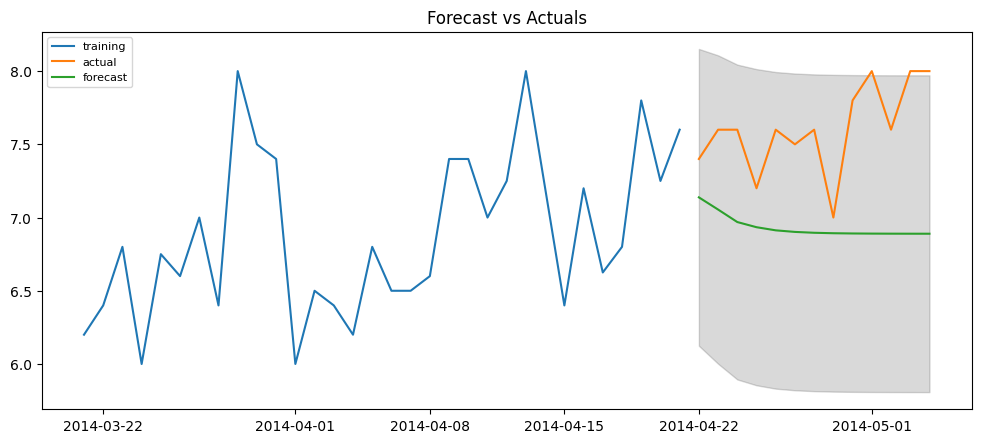

In [536]:
model = ARIMA(train_data_ids["AS14.01"]["mood"].values, order=(2, 0, 0))  
fitted = model.fit(disp=-1)  

# Forecast
best_fc, se, conf = fitted.forecast(len(test_data_ids["AS14.01"]["mood"].values), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(best_fc, index=test_data_ids["AS14.01"].index)
lower_series = pd.Series(conf[:, 0], index=test_data_ids["AS14.01"].index)
upper_series = pd.Series(conf[:, 1], index=test_data_ids["AS14.01"].index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_ids["AS14.01"]["mood"], label='training')
plt.plot(test_data_ids["AS14.01"]["mood"], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [537]:
#Accuracy estimators obtained using the best hyperparamters obtained after the grid search
first_id_best_hyp = forecast_accuracy(test_data_ids["AS14.01"]["mood"].values, best_fc)
print("MAPE:",first_id_best_hyp[0])
print("MAD:", first_id_best_hyp[1])
print("corr:", first_id_best_hyp[2])

MAPE: 8.7
MAD: -0.67
corr: -0.27


Plot the estimation of the test data using the manual tuned hyperparameters for the first id

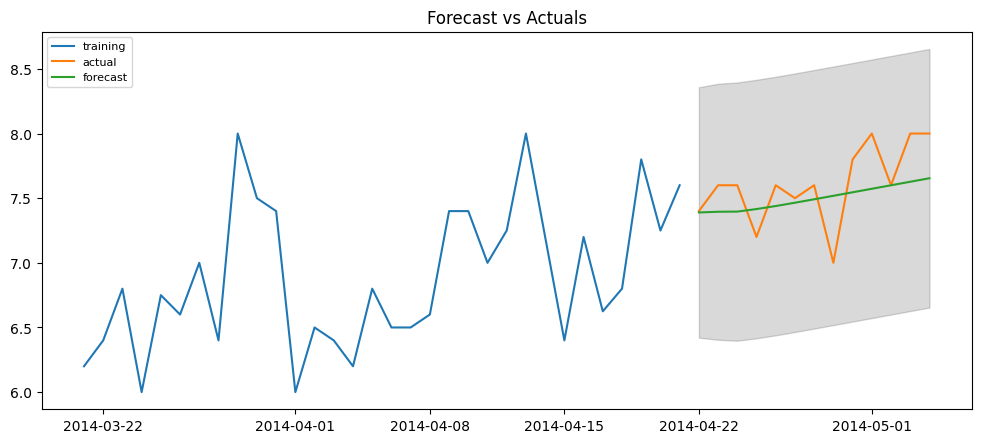

In [538]:
model = ARIMA(train_data_ids["AS14.01"]["mood"].values, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
man_fc, se, conf = fitted.forecast(len(test_data_ids["AS14.01"]["mood"].values), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(man_fc, index=test_data_ids["AS14.01"].index)
lower_series = pd.Series(conf[:, 0], index=test_data_ids["AS14.01"].index)
upper_series = pd.Series(conf[:, 1], index=test_data_ids["AS14.01"].index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_ids["AS14.01"]["mood"], label='training')
plt.plot(test_data_ids["AS14.01"]["mood"], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [539]:
#Accuracy estimators obtained after using manual tuning of the paramters
first_id_man_param = forecast_accuracy(test_data_ids["AS14.01"]["mood"].values, man_fc)
print("MAPE:", first_id_man_param[0])
print("MAD:", first_id_man_param[1])
print("corr:", first_id_man_param[2])

MAPE: 2.89
MAD: -0.11
corr: 0.59


In [540]:
best_hyp_acc = list()
for id in unique_ids:
    model = ARIMA(train_data_ids[id]["mood"].values, order=(2, 0, 0))  
    fitted = model.fit(disp=-1)  
    # Forecast
    fc, se, conf = fitted.forecast(len(test_data_ids[id]["mood"].values), alpha=0.05)  # 95% conf

    best_hyp_acc.append(forecast_accuracy(test_data_ids[id]["mood"].values, fc))

ARIMA_acc = pd.DataFrame(best_hyp_acc, columns=["MAPE", "MAD", "corr"], index=unique_ids)
ARIMA_acc

MAPE   MAD  corr
AS14.01   8.70 -0.67 -0.27
AS14.02   9.13 -0.05 -0.19
AS14.03   5.03  0.36  0.30
AS14.05   4.68 -0.29  0.41
AS14.06   5.81  0.16 -0.49
AS14.07  16.54  0.25 -0.12
AS14.08   9.32  0.44 -0.04
AS14.09   7.88 -0.14  0.47
AS14.12   8.72  0.28 -0.29
AS14.13  15.52 -1.14  0.62
AS14.14   5.76 -0.25  0.11
AS14.15   3.47  0.16  0.35
AS14.16   9.20 -0.46 -0.21
AS14.17   3.77 -0.03 -0.08
AS14.19   6.48 -0.20  0.20
AS14.20   3.35 -0.19  0.70
AS14.23   6.92 -0.33 -0.12
AS14.24   4.44 -0.05 -0.07
AS14.25   5.90  0.30  0.64
AS14.27   7.67  0.40 -0.04
AS14.28   7.67  0.28  0.57
AS14.29   3.86  0.01  0.26
AS14.30   2.56 -0.15 -0.12
AS14.31   2.35 -0.10  0.20
AS14.32  10.92  0.56  0.03
AS14.33   9.85  0.28  0.09

In [541]:
ARIMA_acc.describe()

MAPE        MAD       corr
count  26.000000  26.000000  26.000000
mean    7.134615  -0.021923   0.111923
std     3.558477   0.378048   0.321770
min     2.350000  -1.140000  -0.490000
25%     4.500000  -0.197500  -0.120000
50%     6.700000  -0.040000   0.060000
75%     9.027500   0.280000   0.337500
max    16.540000   0.560000   0.700000

LSTM model

In [707]:
from sklearn.preprocessing import MinMaxScaler

In [708]:
train_data_LSTM = dict()
test_data_LSTM = dict()

for id in unique_ids:
    train_data_LSTM[id], test_data_LSTM[id] = separate_data(preprocesed_data[id]["mood"].values)

In [709]:
def sliding_window(data, seq_len=4):
    
    si = list()
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len]
        y = data[i+seq_len]
        si.append((x, y))

    return si

In [710]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = dict()
input_seq = list()

for id in unique_ids:
    train_data_normalized[id] = scaler.fit_transform(train_data_LSTM[id].reshape(-1, 1))
    train_data_normalized[id] = torch.FloatTensor(train_data_normalized[id]).view(-1)
    for sequence in sliding_window(train_data_normalized[id]):
        input_seq.append(sequence)

In [711]:
input_seq

[(tensor([-0.8000, -0.6000, -0.2000, -1.0000]), tensor(-0.2500)),
 (tensor([-0.6000, -0.2000, -1.0000, -0.2500]), tensor(-0.4000)),
 (tensor([-0.2000, -1.0000, -0.2500, -0.4000]), tensor(0.)),
 (tensor([-1.0000, -0.2500, -0.4000,  0.0000]), tensor(-0.6000)),
 (tensor([-0.2500, -0.4000,  0.0000, -0.6000]), tensor(1.)),
 (tensor([-0.4000,  0.0000, -0.6000,  1.0000]), tensor(0.5000)),
 (tensor([ 0.0000, -0.6000,  1.0000,  0.5000]), tensor(0.4000)),
 (tensor([-0.6000,  1.0000,  0.5000,  0.4000]), tensor(-1.)),
 (tensor([ 1.0000,  0.5000,  0.4000, -1.0000]), tensor(-0.5000)),
 (tensor([ 0.5000,  0.4000, -1.0000, -0.5000]), tensor(-0.6000)),
 (tensor([ 0.4000, -1.0000, -0.5000, -0.6000]), tensor(-0.8000)),
 (tensor([-1.0000, -0.5000, -0.6000, -0.8000]), tensor(-0.2000)),
 (tensor([-0.5000, -0.6000, -0.8000, -0.2000]), tensor(-0.5000)),
 (tensor([-0.6000, -0.8000, -0.2000, -0.5000]), tensor(-0.5000)),
 (tensor([-0.8000, -0.2000, -0.5000, -0.5000]), tensor(-0.4000)),
 (tensor([-0.2000, -0.5000

In [712]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [713]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [714]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [715]:
epochs = 50

for i in range(epochs):    
    for seq, labels in input_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()


    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   0 loss: 0.0812781081
epoch:   1 loss: 0.0825636536
epoch:   2 loss: 0.0829902142
epoch:   3 loss: 0.0814265609
epoch:   4 loss: 0.0795252100
epoch:   5 loss: 0.0797768012
epoch:   6 loss: 0.0822347999
epoch:   7 loss: 0.0712795705
epoch:   8 loss: 0.0786389932
epoch:   9 loss: 0.0793225616
epoch:  10 loss: 0.0770477727
epoch:  11 loss: 0.0748834983
epoch:  12 loss: 0.0741974860
epoch:  13 loss: 0.0754327103
epoch:  14 loss: 0.0766416043
epoch:  15 loss: 0.0820982233
epoch:  16 loss: 0.0938756838
epoch:  17 loss: 0.0925358757
epoch:  18 loss: 0.1066741496
epoch:  19 loss: 0.1185033619
epoch:  20 loss: 0.1189903915
epoch:  21 loss: 0.1158680469
epoch:  22 loss: 0.1130591556
epoch:  23 loss: 0.1081083938
epoch:  24 loss: 0.0999126509
epoch:  25 loss: 0.0854204819
epoch:  26 loss: 0.0834423527
epoch:  27 loss: 0.0830654725
epoch:  28 loss: 0.0826618299
epoch:  29 loss: 0.0860500708
epoch:  30 loss: 0.0917459428
epoch:  31 loss: 0.0937883332
epoch:  32 loss: 0.0923932344
epoch:  33

In [716]:
fut_pred = 12

test_inputs = train_data_normalized["AS14.01"][-len(test_data_LSTM["AS14.01"]):].tolist()
print(test_inputs)

[0.4000000059604645, 0.4000000059604645, 0.0, 0.25, 1.0, 0.20000000298023224, -0.6000000238418579, 0.20000000298023224, -0.375, -0.20000000298023224, 0.800000011920929, 0.25, 0.6000000238418579]


In [717]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_data_LSTM["AS14.01"][-len(test_data_LSTM["AS14.01"]):])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [718]:
test_inputs[fut_pred:]

[0.6000000238418579,
 -1.3470158576965332,
 -1.2224212884902954,
 -1.075640320777893,
 -1.1610523462295532,
 -0.7763376235961914,
 -0.7905659675598145,
 -0.8168510794639587,
 -0.82825767993927,
 -0.5785795450210571,
 -0.8256834745407104,
 -0.6913142800331116,
 -0.7908576726913452]

In [719]:
actual_predictions = scaler.inverse_transform(np.array(test_data_LSTM["AS14.01"][-len(test_data_LSTM["AS14.01"]):] ).reshape(-1, 1))
print(actual_predictions)

[[19.92]
 [20.28]
 [20.28]
 [19.56]
 [20.28]
 [20.1 ]
 [20.28]
 [19.2 ]
 [20.64]
 [21.  ]
 [20.28]
 [21.  ]
 [21.  ]]


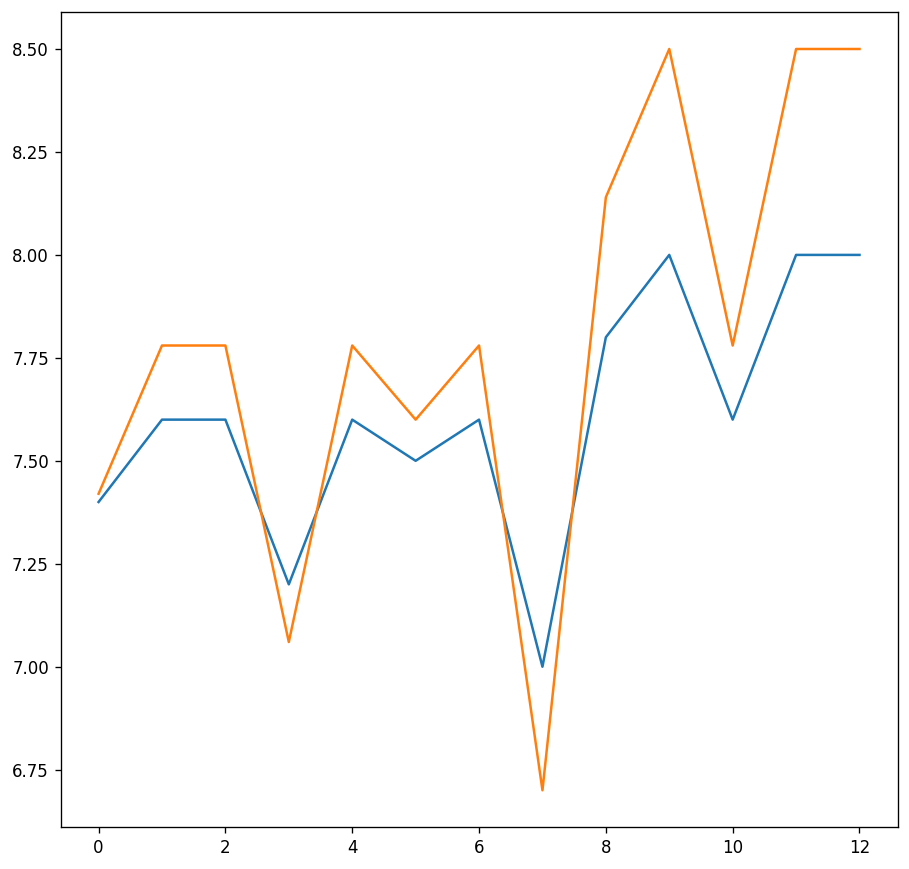

In [720]:
plt.plot(test_data_LSTM["AS14.01"])
plt.plot(actual_predictions - 12.5)
plt.show()

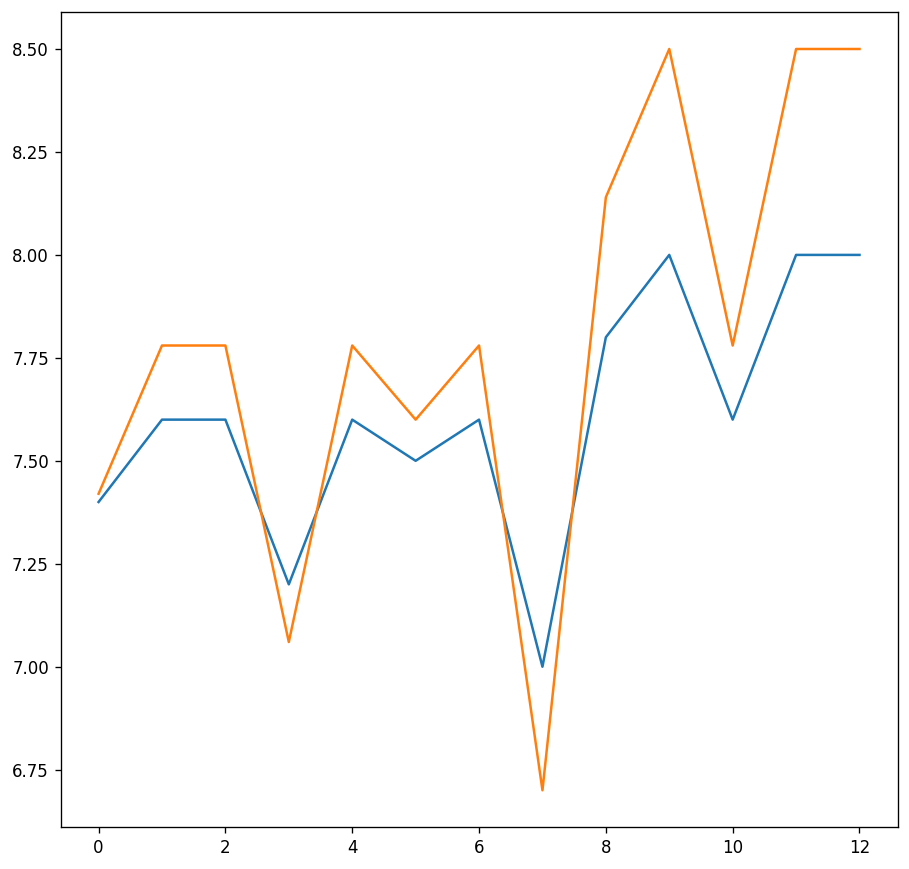

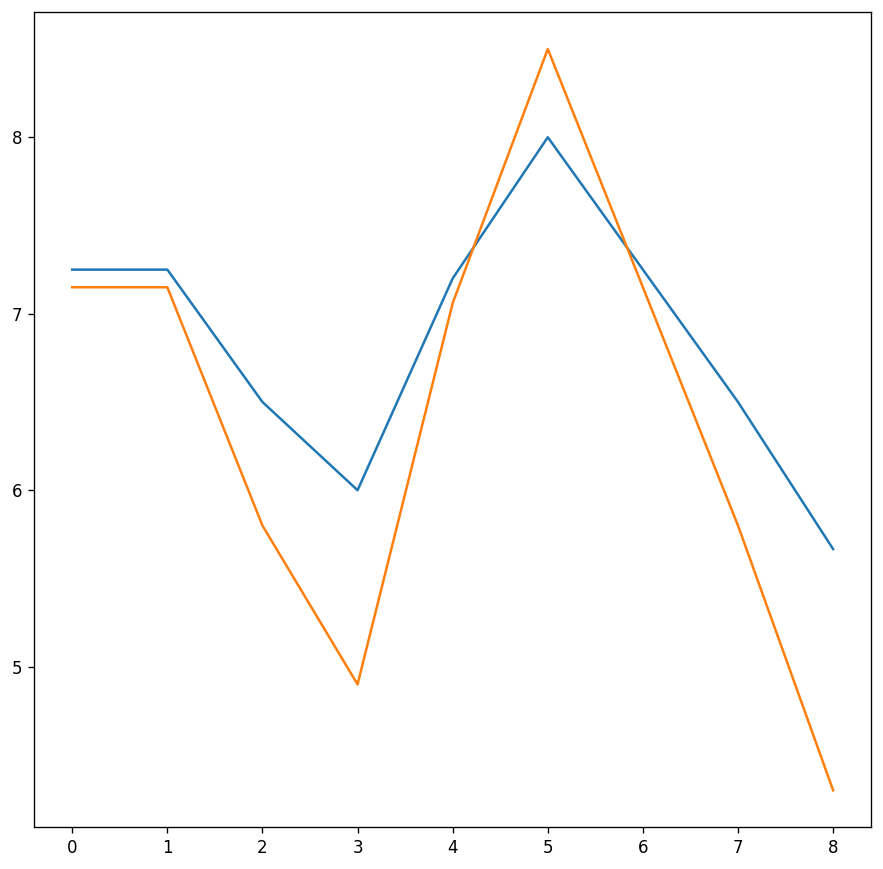

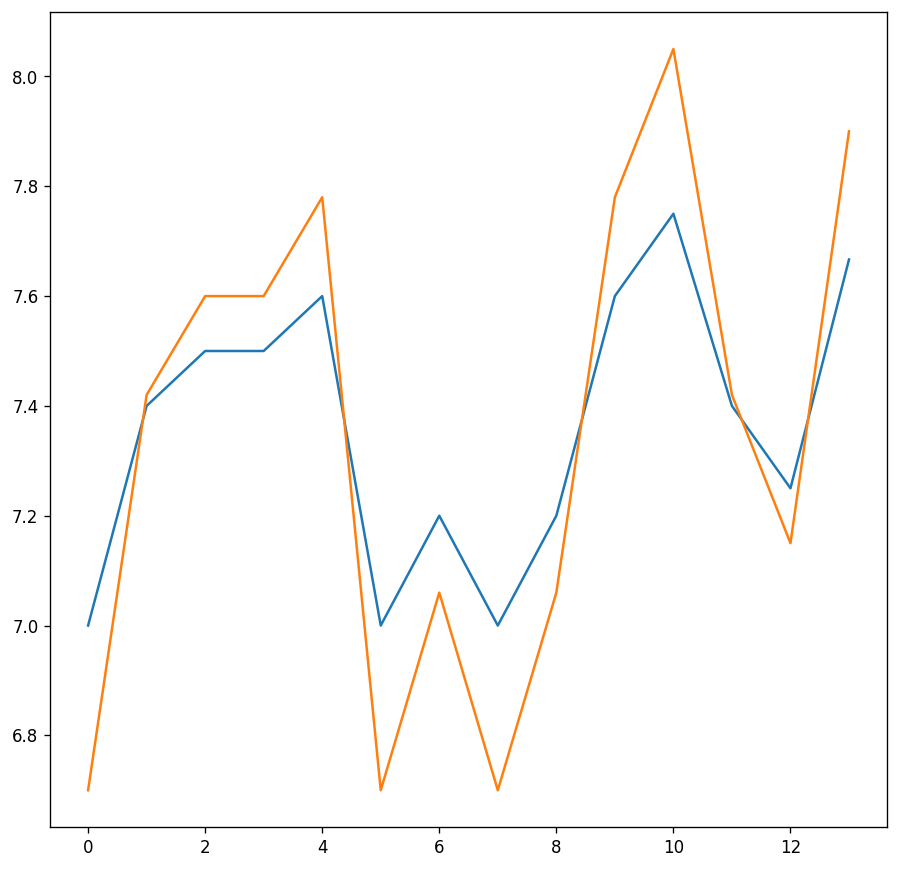

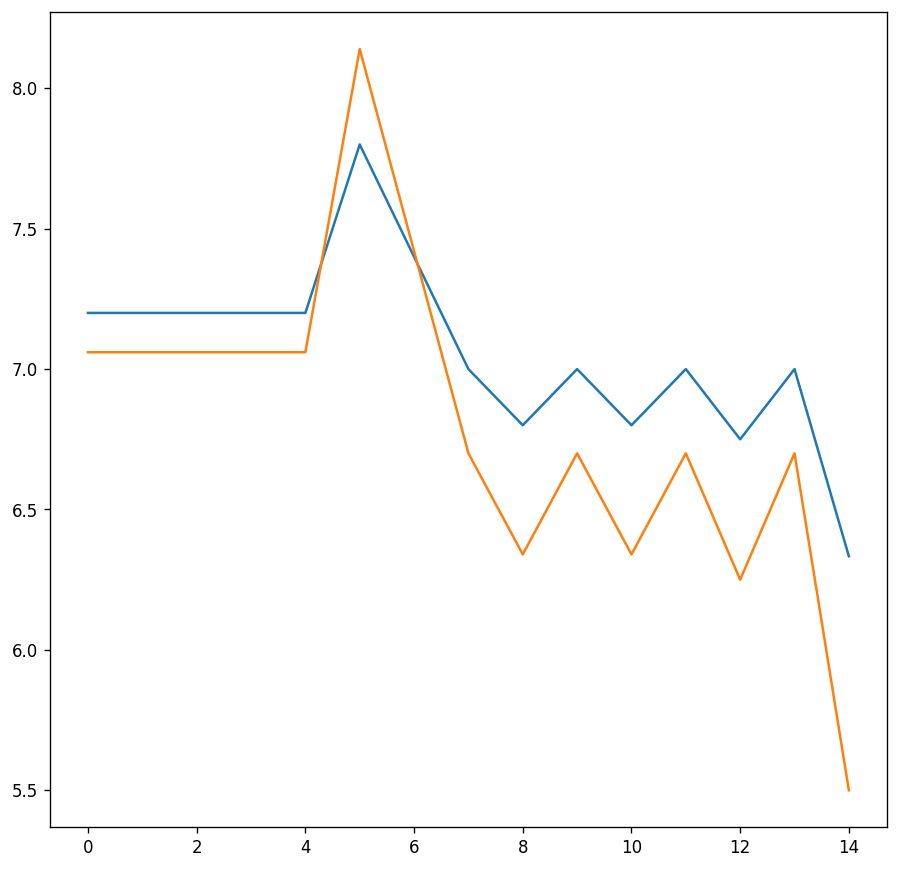

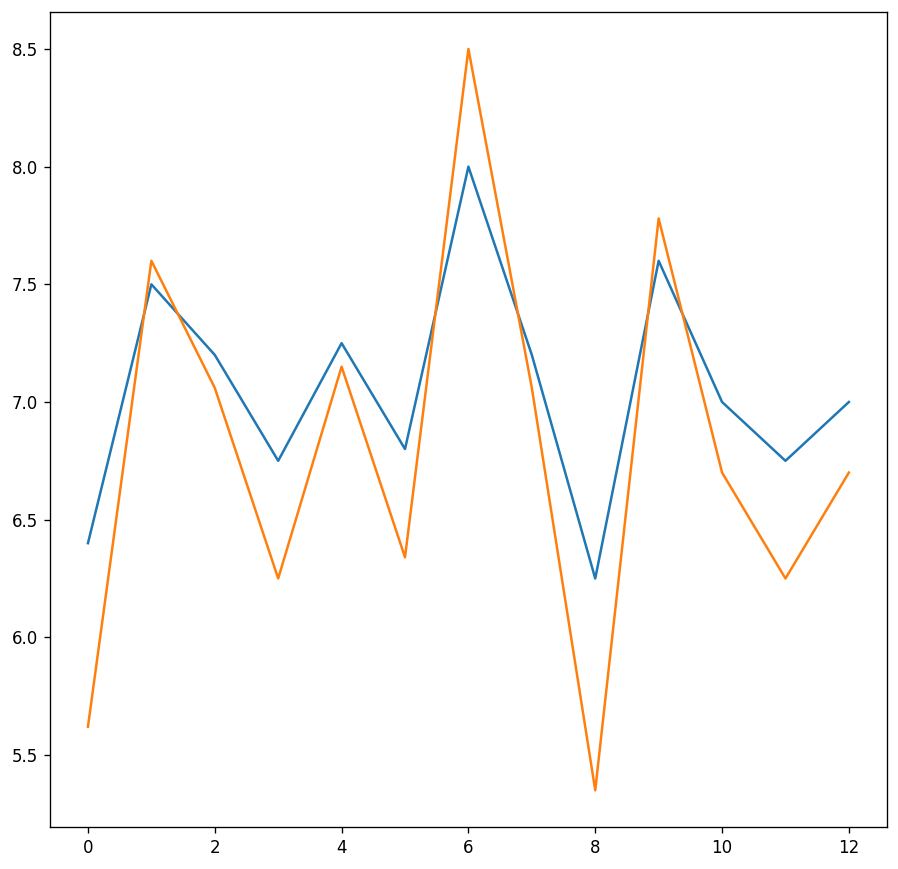

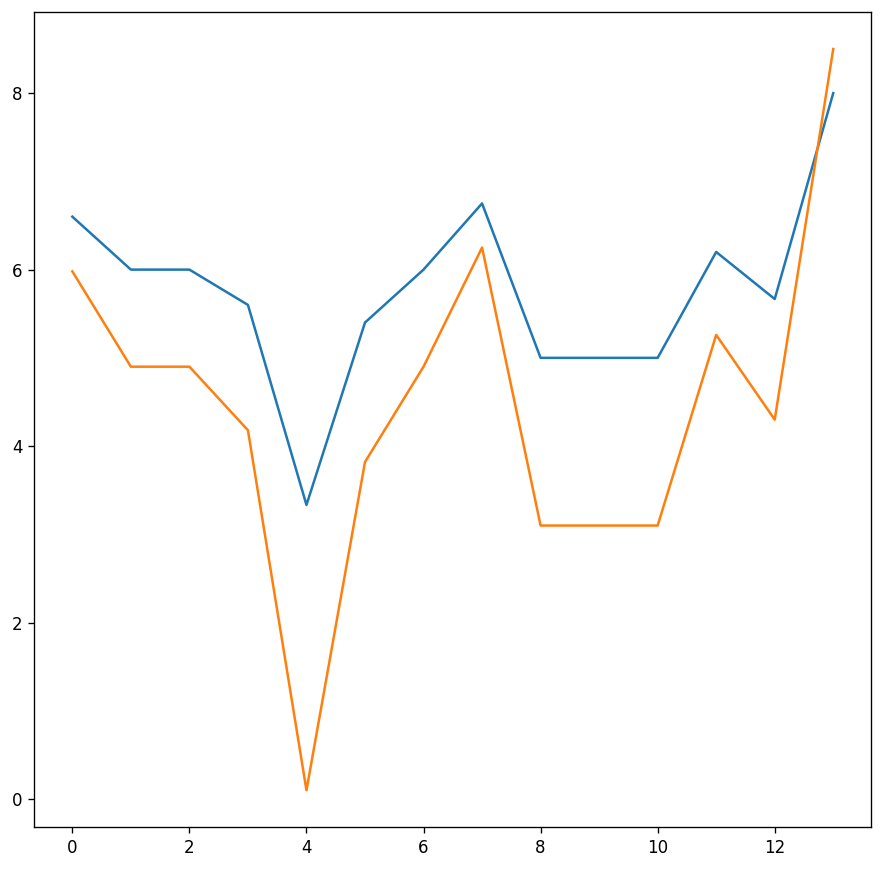

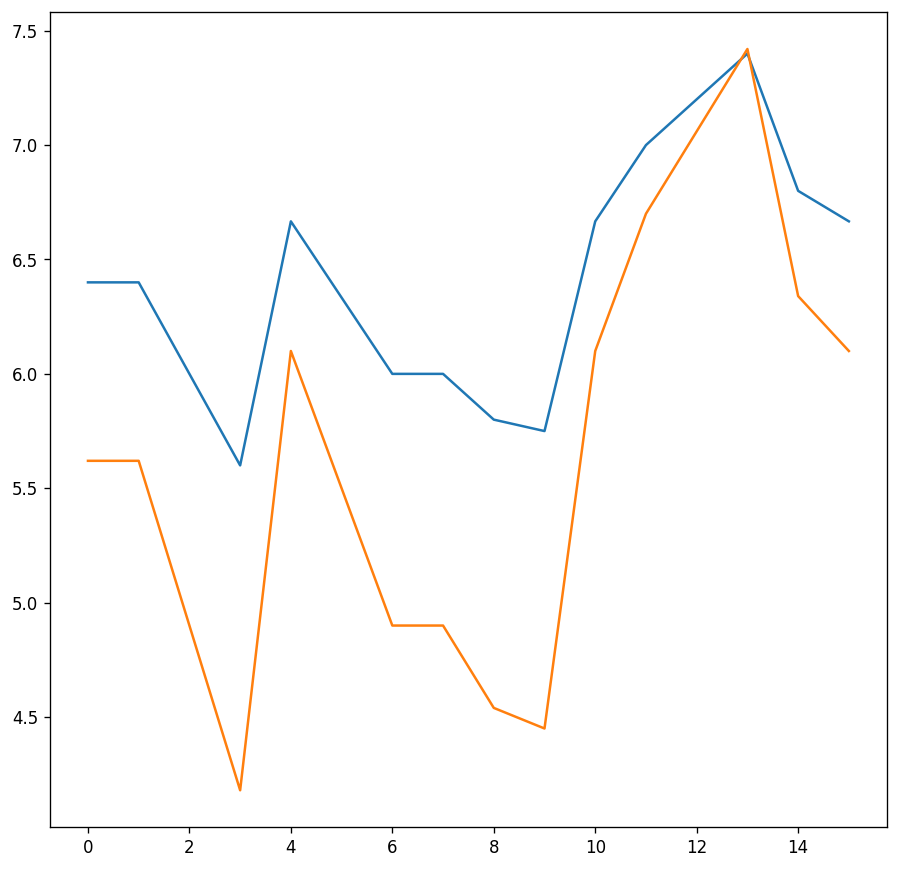

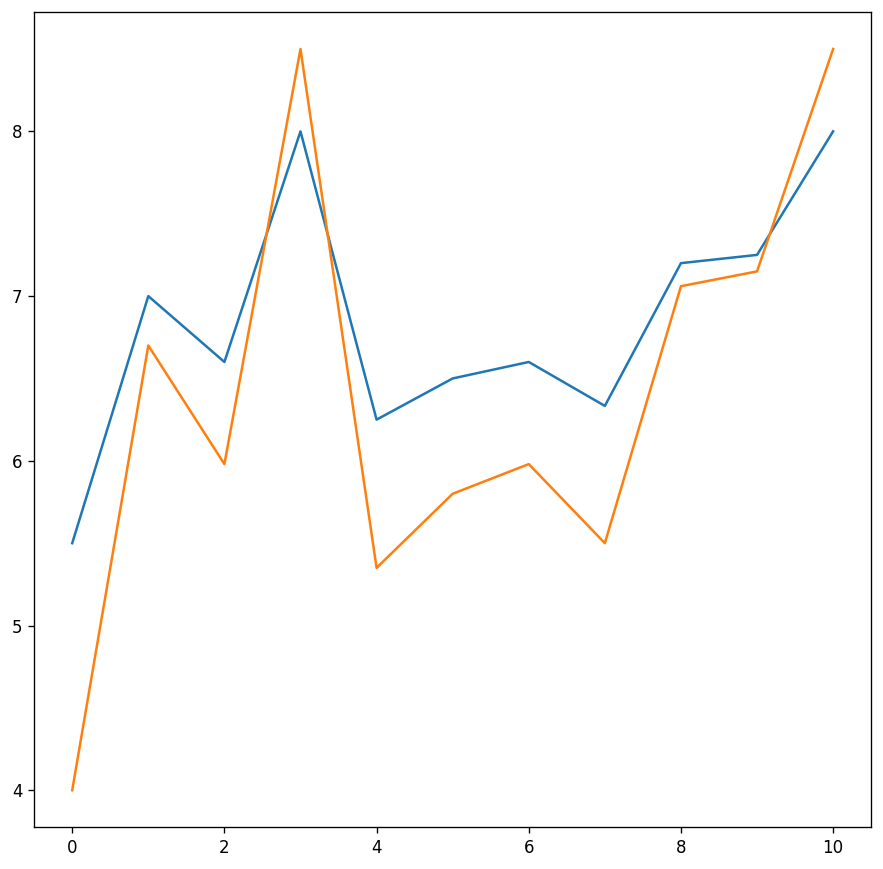

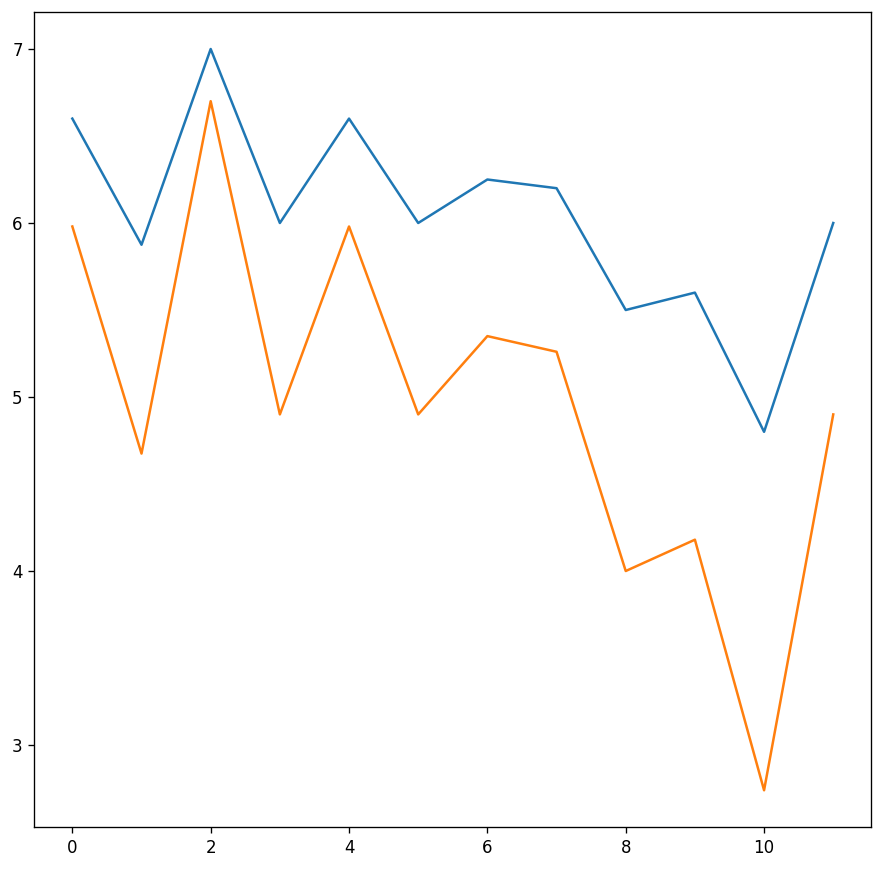

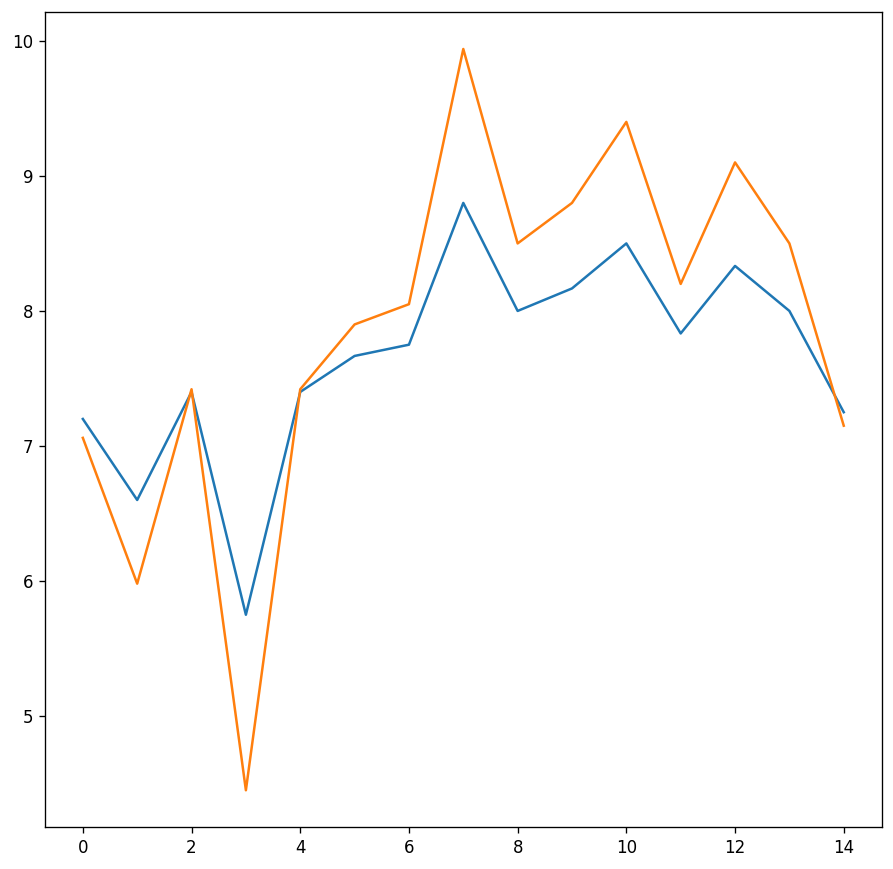

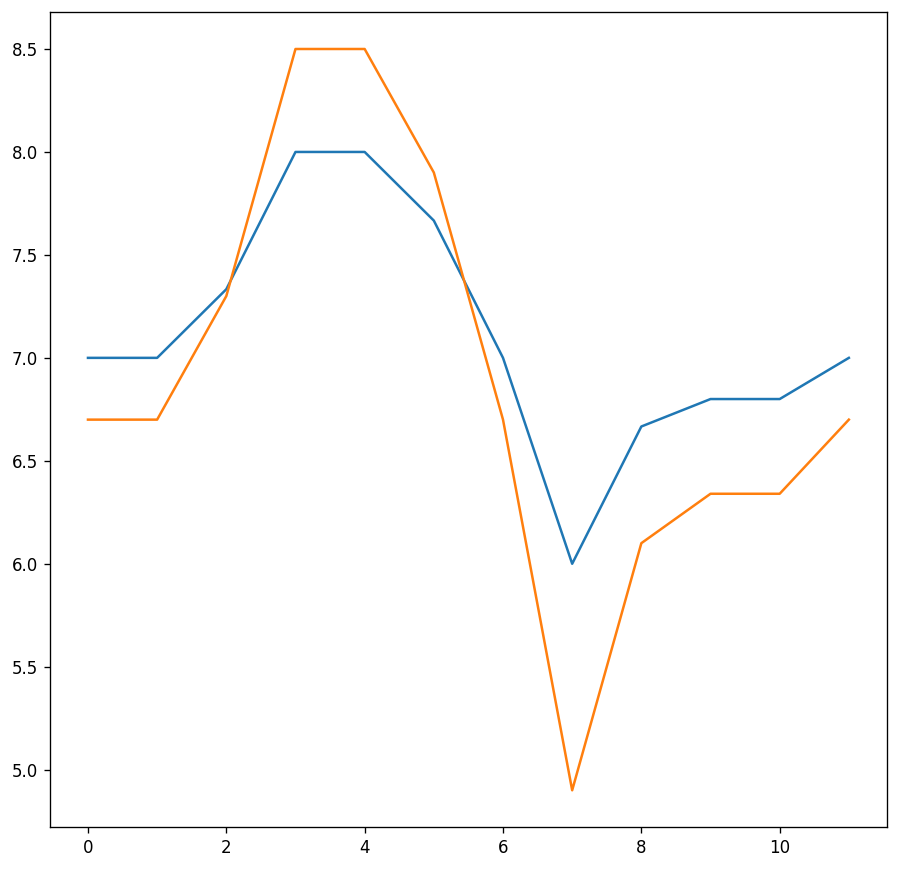

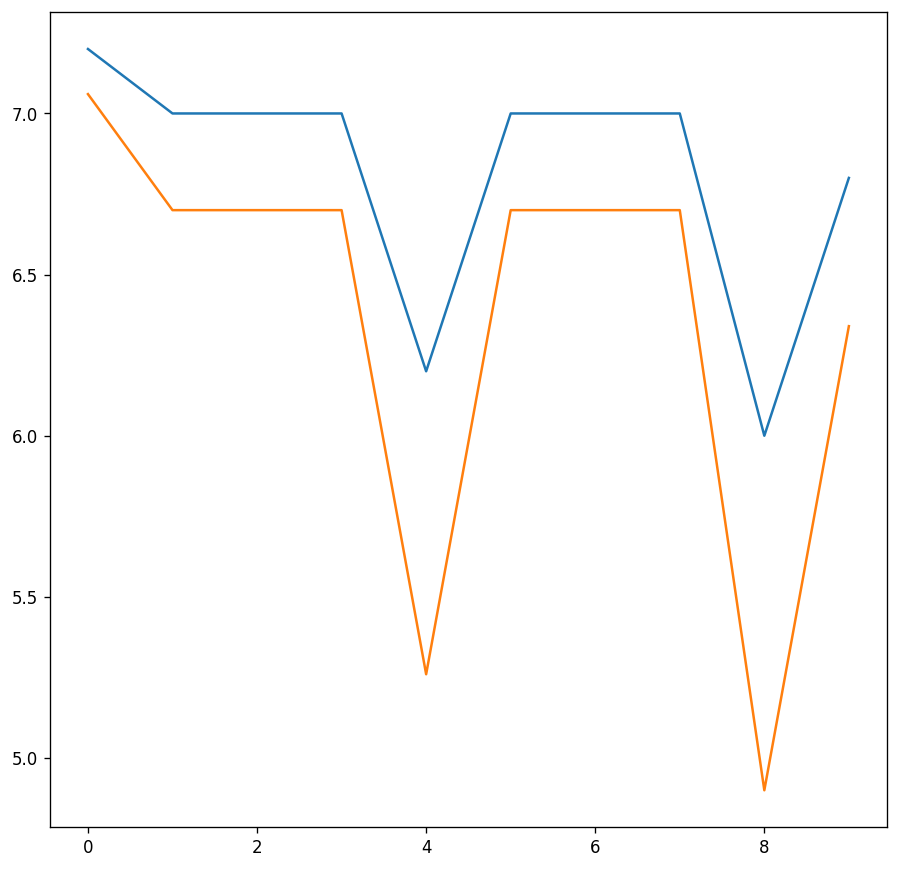

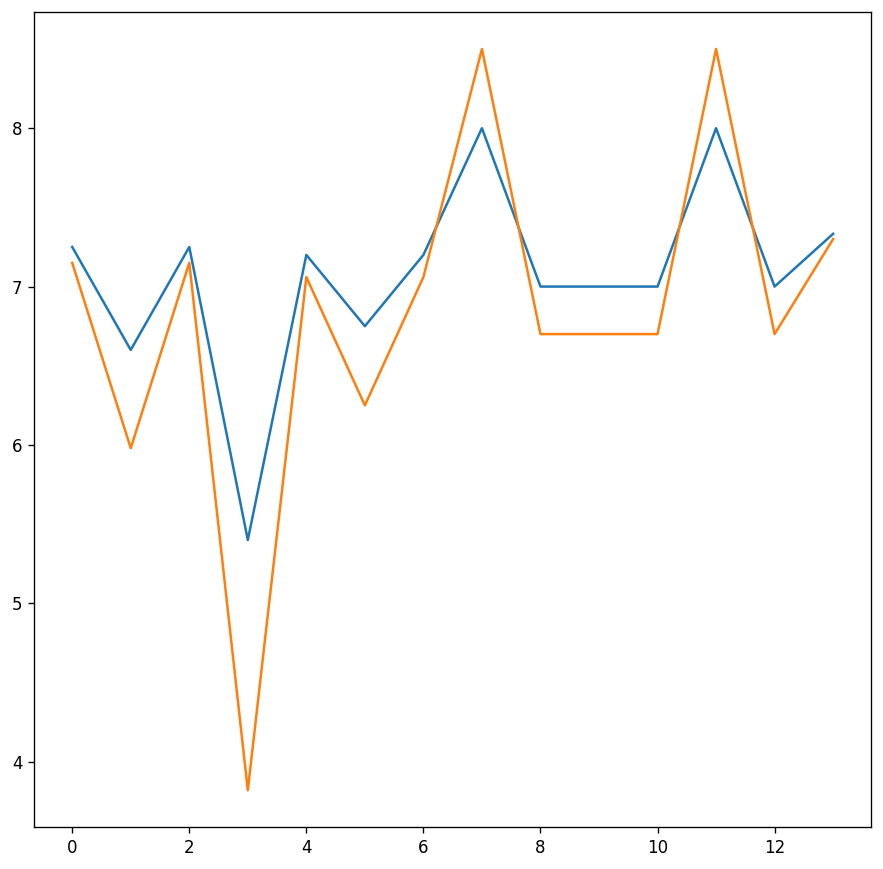

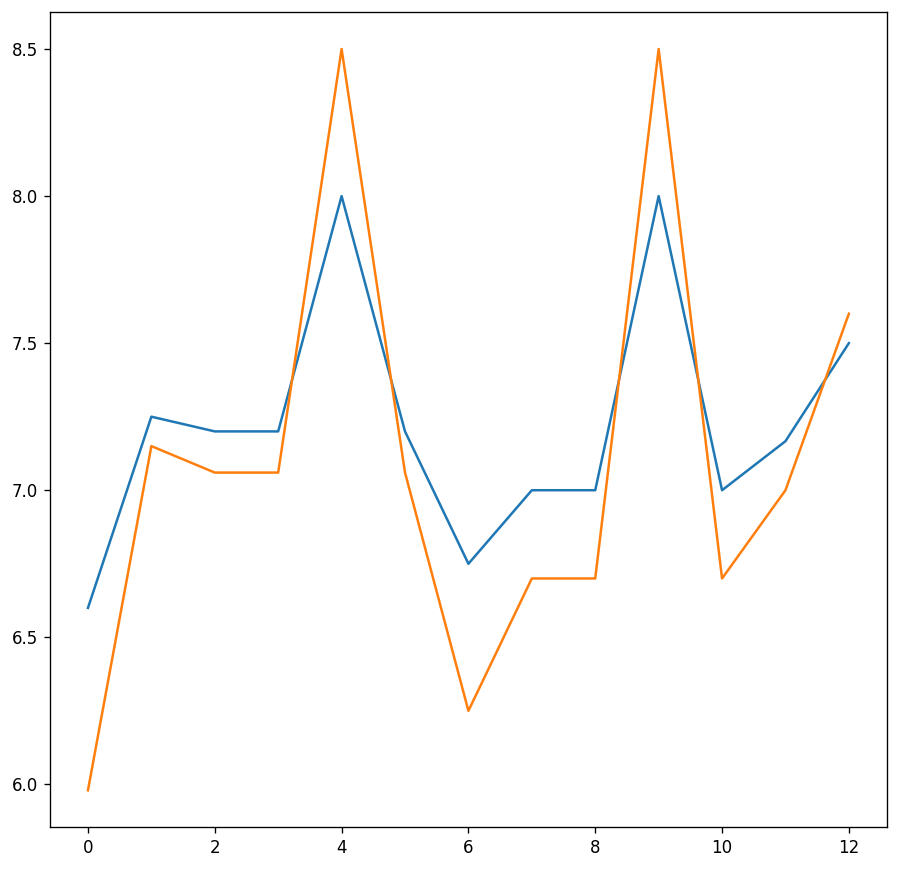

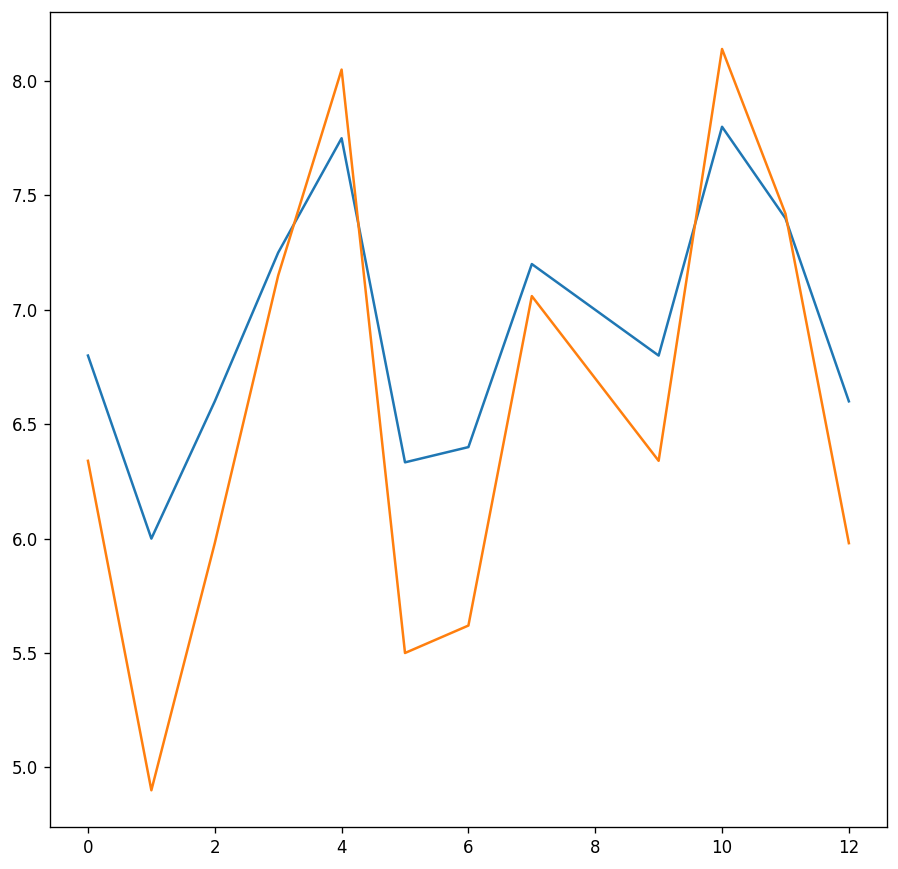

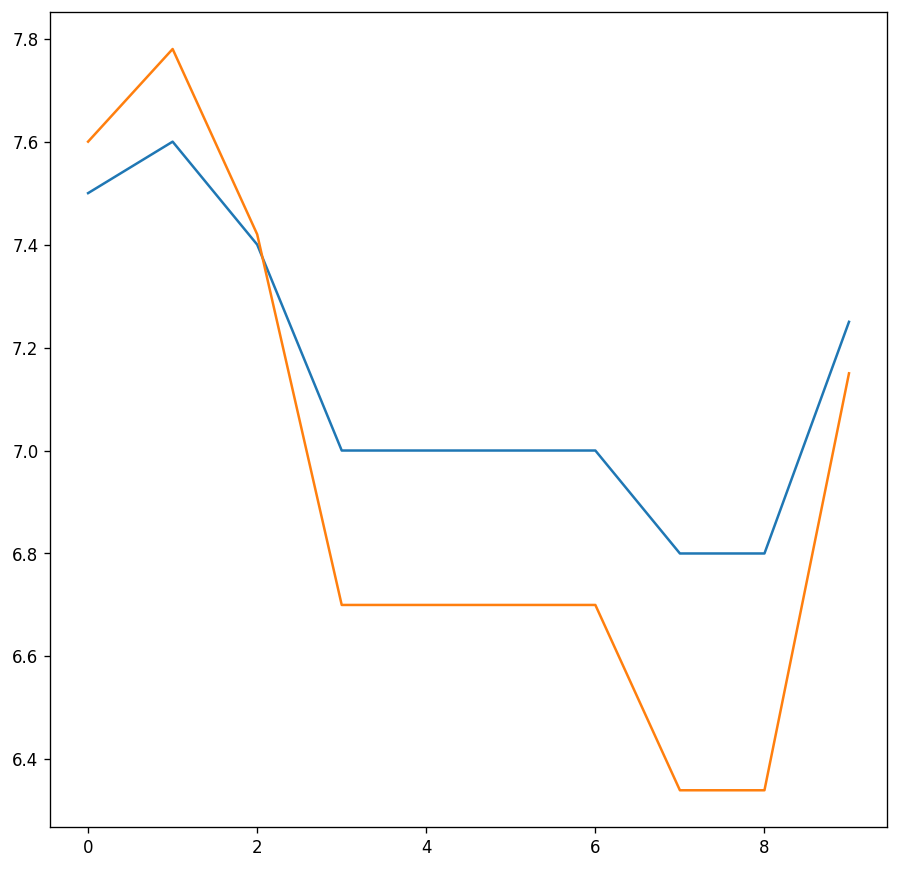

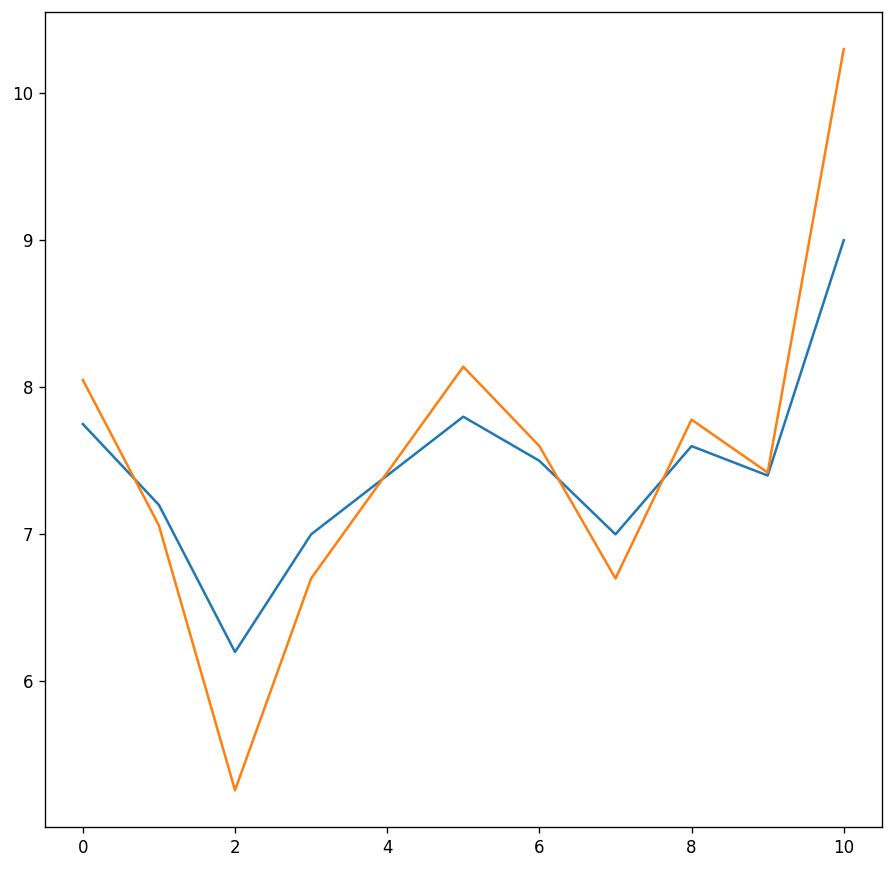

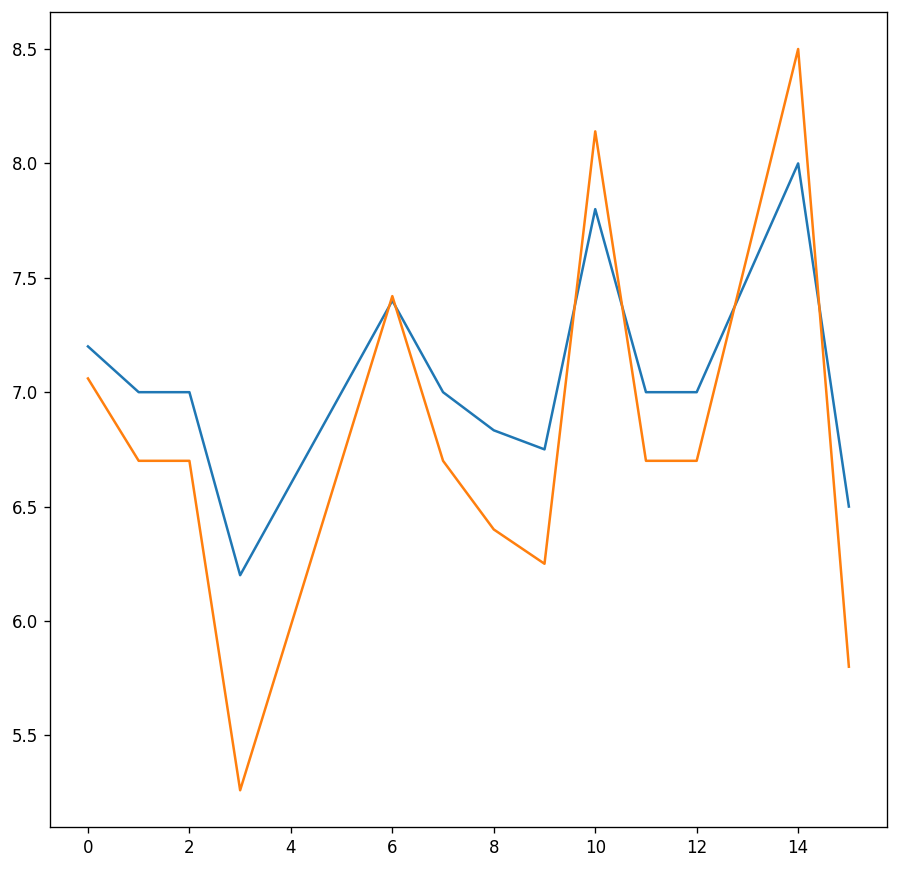

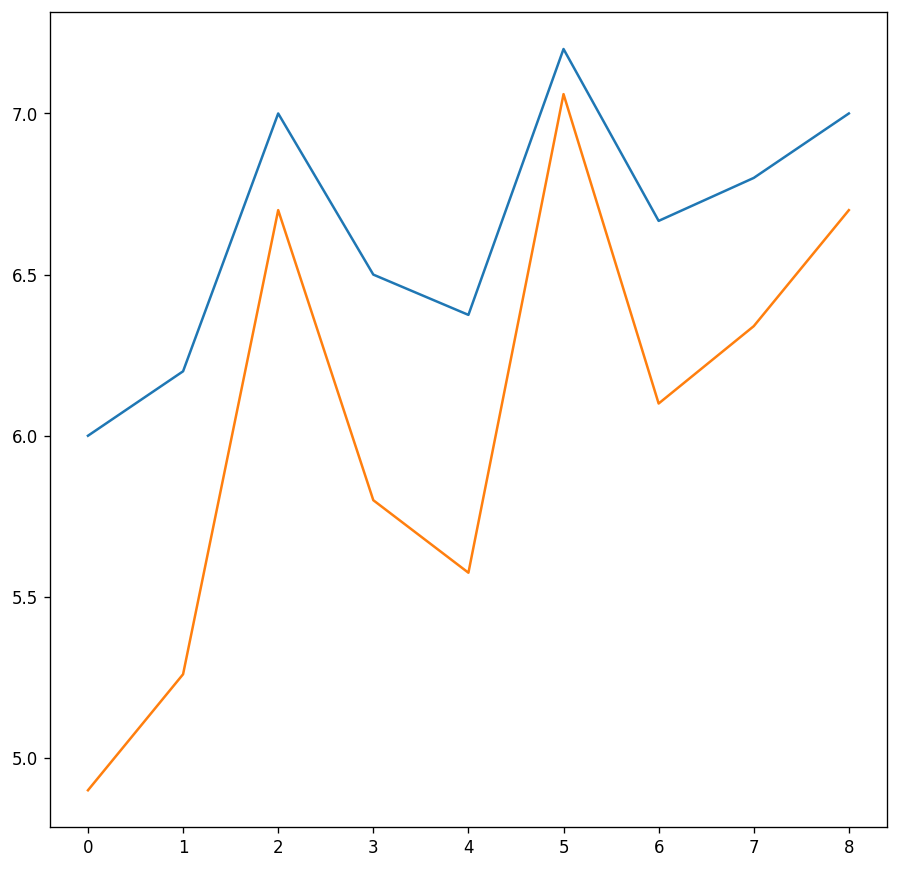

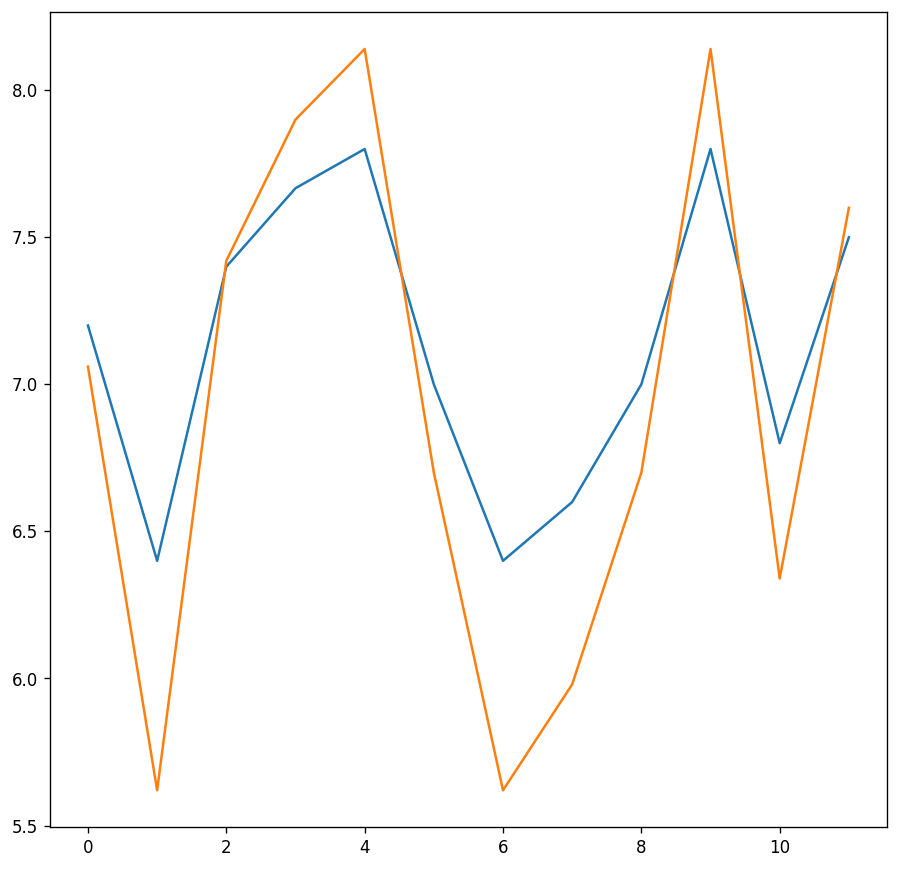

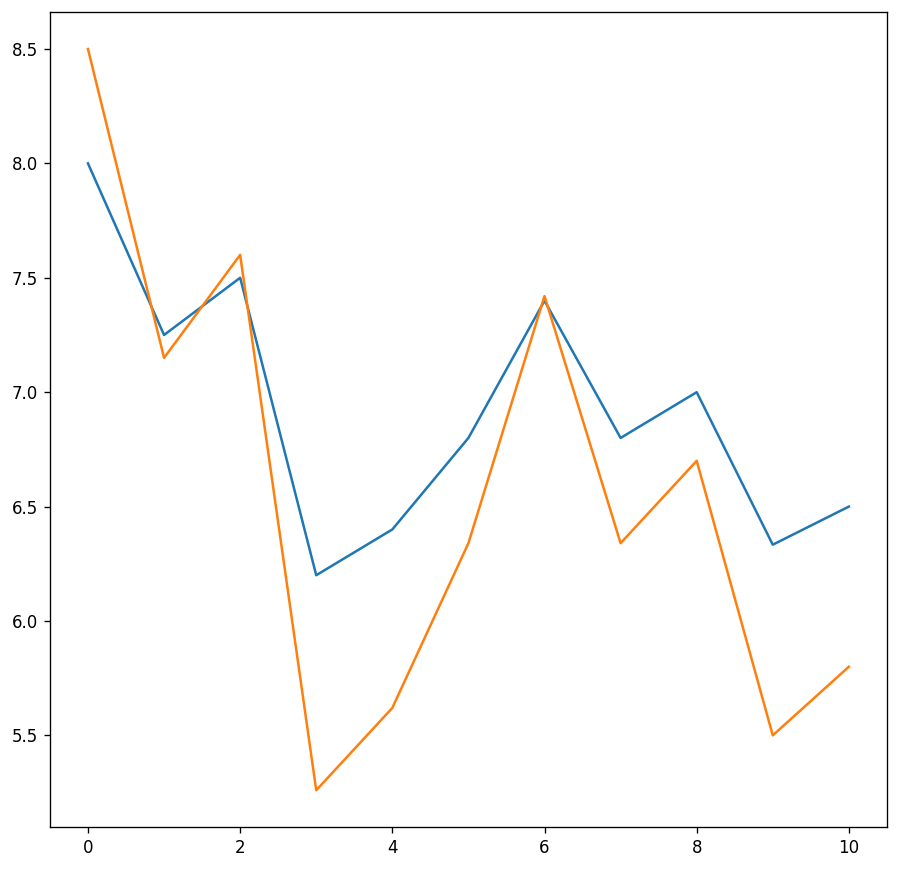

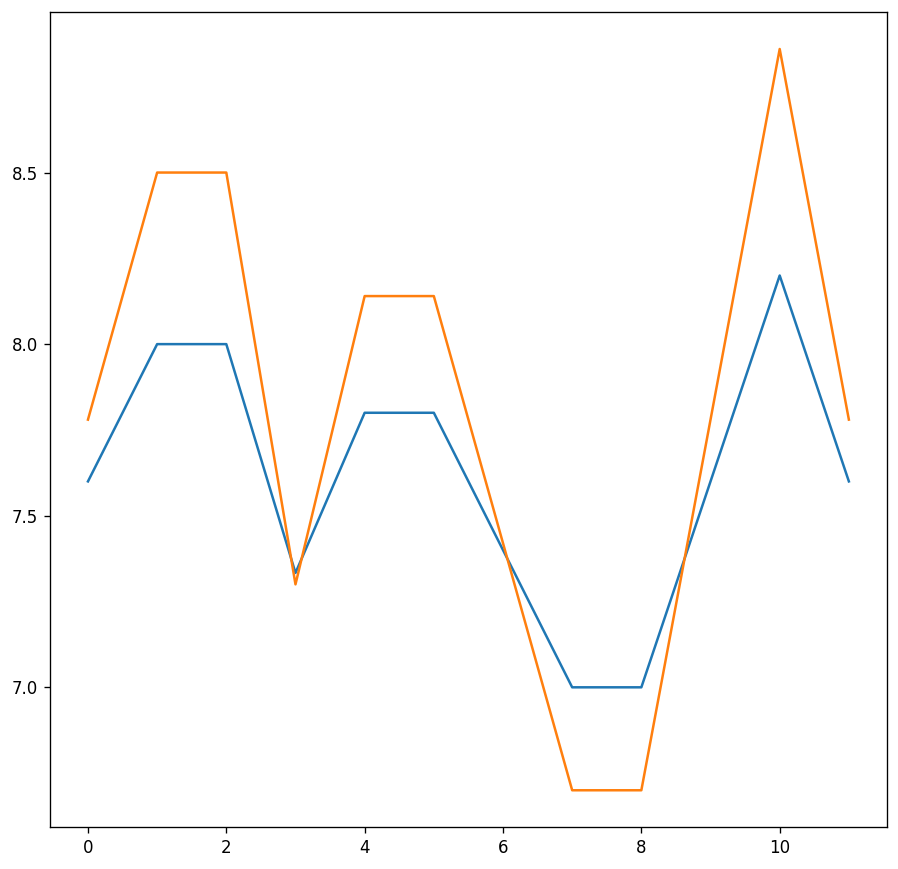

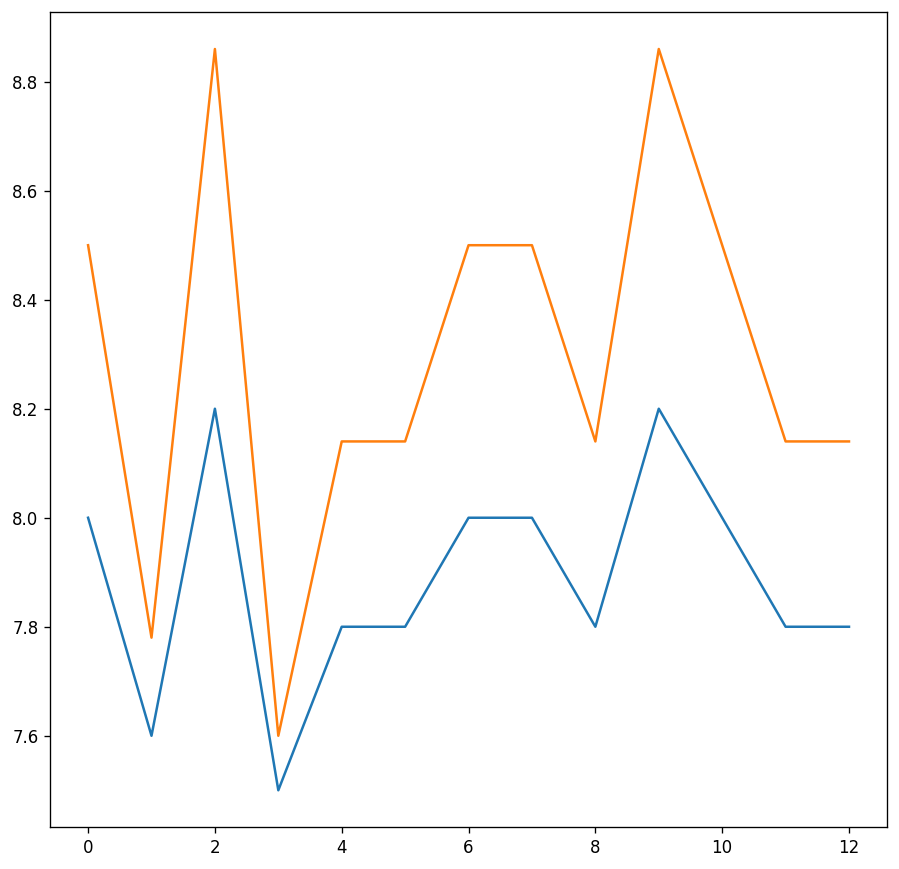

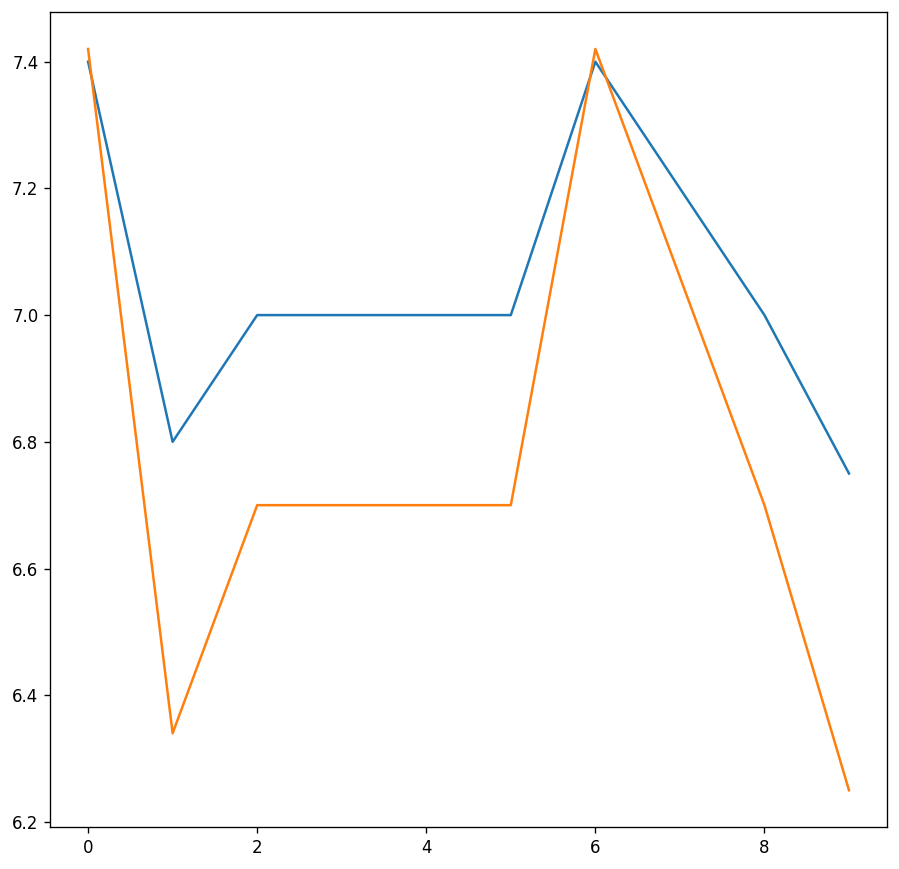

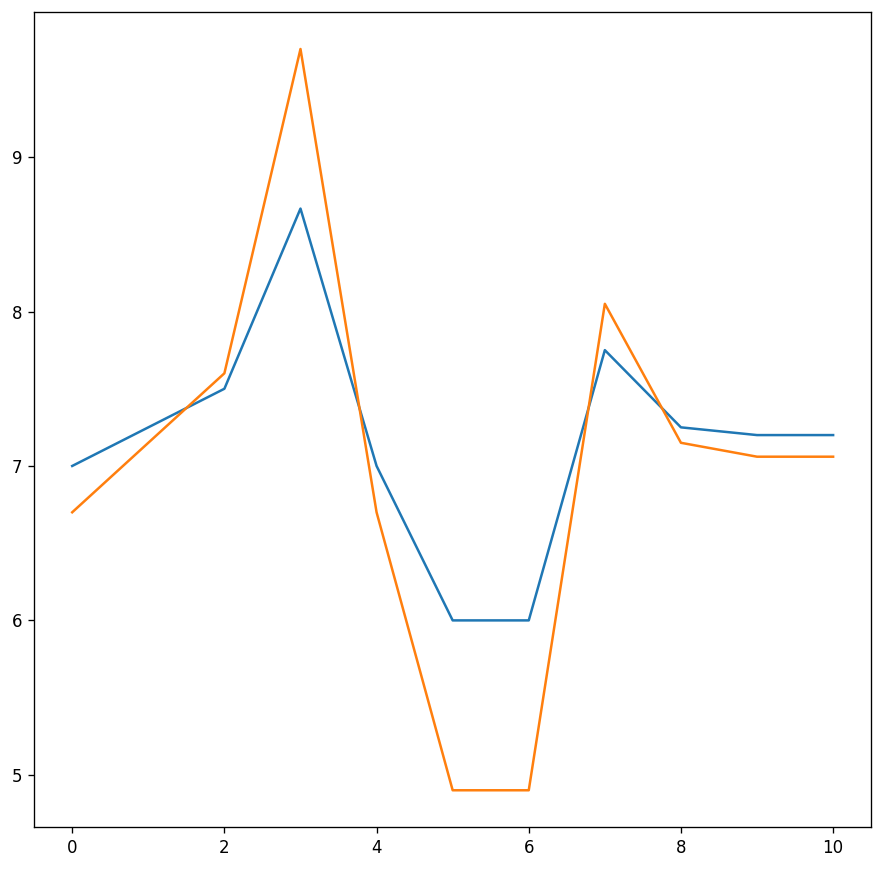

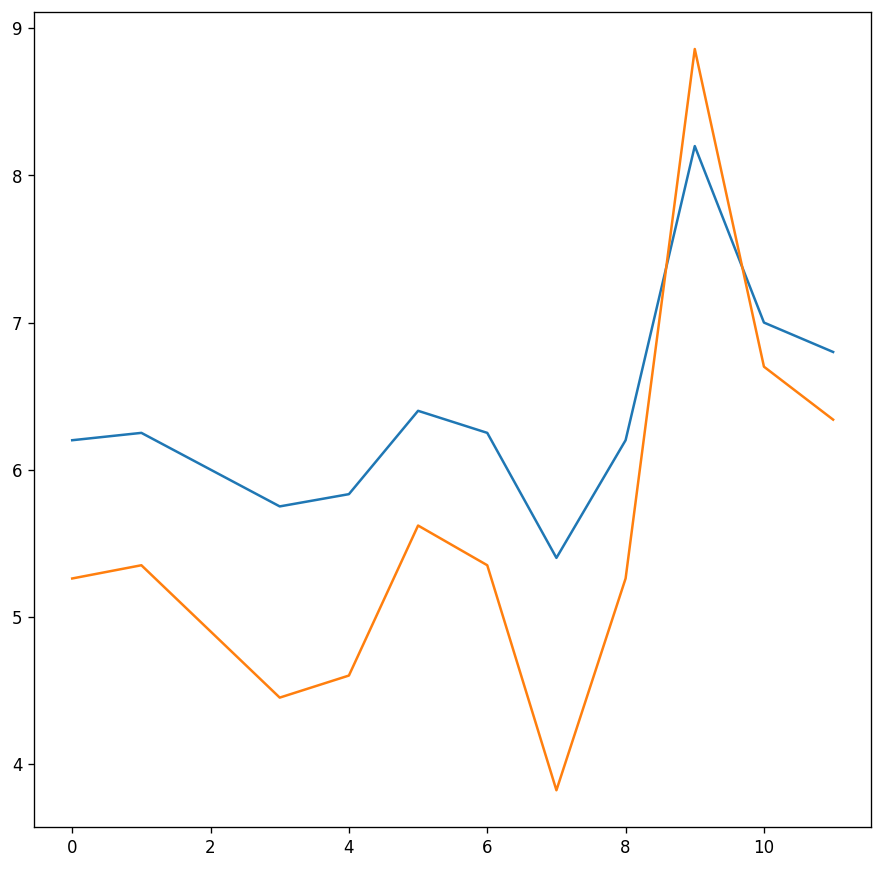

In [741]:
fut_pred = 20
actual_predictions_ids = dict()
predictions_acc = list()

for id in unique_ids:
    test_inputs = train_data_normalized[id][-len(test_data_LSTM[id]):].tolist()
    model.eval()

    for i in range(fut_pred):
        seq = torch.FloatTensor(test_data_LSTM[id][-len(test_data_LSTM[id]):])
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
            test_inputs.append(model(seq).item())

    actual_predictions_ids[id] = scaler.inverse_transform(np.array(test_data_LSTM[id][-len(test_data_LSTM[id]):] ).reshape(-1, 1)) - 12.5

    plt.plot(test_data_LSTM[id])
    plt.plot(actual_predictions_ids[id])
    plt.show()

    predictions_acc.append(forecast_accuracy(test_data_LSTM[id], actual_predictions_ids[id], verif_corr=False))

LSTM_acc = pd.DataFrame(predictions_acc, columns=["MAPE", "MAD"], index=unique_ids)

In [742]:
LSTM_acc 

MAPE   MAD
AS14.01   6.69  0.19
AS14.02  17.27 -0.42
AS14.03   5.78 -0.01
AS14.05   7.63 -0.25
AS14.06  11.23 -0.26
AS14.07  33.93 -1.30
AS14.08  16.59 -0.77
AS14.09  18.29 -0.43
AS14.12  20.62 -1.07
AS14.13  16.32  0.21
AS14.14  12.97 -0.22
AS14.15   9.54 -0.44
AS14.16  12.86 -0.24
AS14.17   8.87 -0.12
AS14.19  13.53 -0.37
AS14.20   7.00 -0.19
AS14.23  13.29  0.05
AS14.24  10.80 -0.26
AS14.25  11.76 -0.59
AS14.27  12.05 -0.20
AS14.28  13.88 -0.36
AS14.29   8.46  0.19
AS14.30   6.15  0.41
AS14.31   5.91 -0.26
AS14.32  15.55 -0.17
AS14.33  20.85 -0.81

In [743]:
LSTM_acc.describe()

MAPE        MAD
count  26.000000  26.000000
mean   12.993077  -0.295769
std     6.163004   0.387641
min     5.780000  -1.300000
25%     8.562500  -0.427500
50%    12.455000  -0.255000
75%    16.127500  -0.132500
max    33.930000   0.410000

Multivariable NN